In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv("Data/Interpolated_soil_combined/combined_zones.csv")
df = df[df['PhosphorusTreatment'] == 0]
df['Yield'] = [y * 25.4016 for y in df['Yield']]

In [5]:
df.columns.values

array(['Longitude', 'Latitude', 'Yield', 'Moisture', 'PlotID', 'FieldID',
       'elevation', 'slope', 'aspect', 'TOC_0_2', 'TC_0_2', 'IC_0_2',
       'TN_0_2', 'DI_Al_0_2', 'DI_Ca_0_2', 'DI_Fe_0_2', 'DI_K_0_2',
       'DI_Mg_0_2', 'DI_P_0_2', 'H3A_Al_0_2', 'H3A_Ca_0_2', 'H3A_Fe_0_2',
       'H3A_K_0_2', 'H3A_Mg_0_2', 'H3A_P_0_2', 'M3_Al_0_2', 'M3_Ca_0_2',
       'M3_Fe_0_2', 'M3_K_0_2', 'M3_Mg_0_2', 'M3_P_0_2', 'Ols_Al_0_2',
       'Ols_Ca_0_2', 'Ols_Fe_0_2', 'Ols_K_0_2', 'Ols_Mg_0_2', 'Ols_P_0_2',
       'TOC_2_6', 'TC_2_6', 'IC_2_6', 'TN_2_6', 'DI_Al_2_6', 'DI_Ca_2_6',
       'DI_Fe_2_6', 'DI_K_2_6', 'DI_Mg_2_6', 'DI_P_2_6', 'H3A_Al_2_6',
       'H3A_Ca_2_6', 'H3A_Fe_2_6', 'H3A_K_2_6', 'H3A_Mg_2_6', 'H3A_P_2_6',
       'M3_Al_2_6', 'M3_Ca_2_6', 'M3_Fe_2_6', 'M3_K_2_6', 'M3_Mg_2_6',
       'M3_P_2_6', 'Ols_Al_2_6', 'Ols_Ca_2_6', 'Ols_Fe_2_6', 'Ols_K_2_6',
       'Ols_Mg_2_6', 'Ols_P_2_6', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4',
       'Year', 'PhosphorusTreatment'], dtype=object)

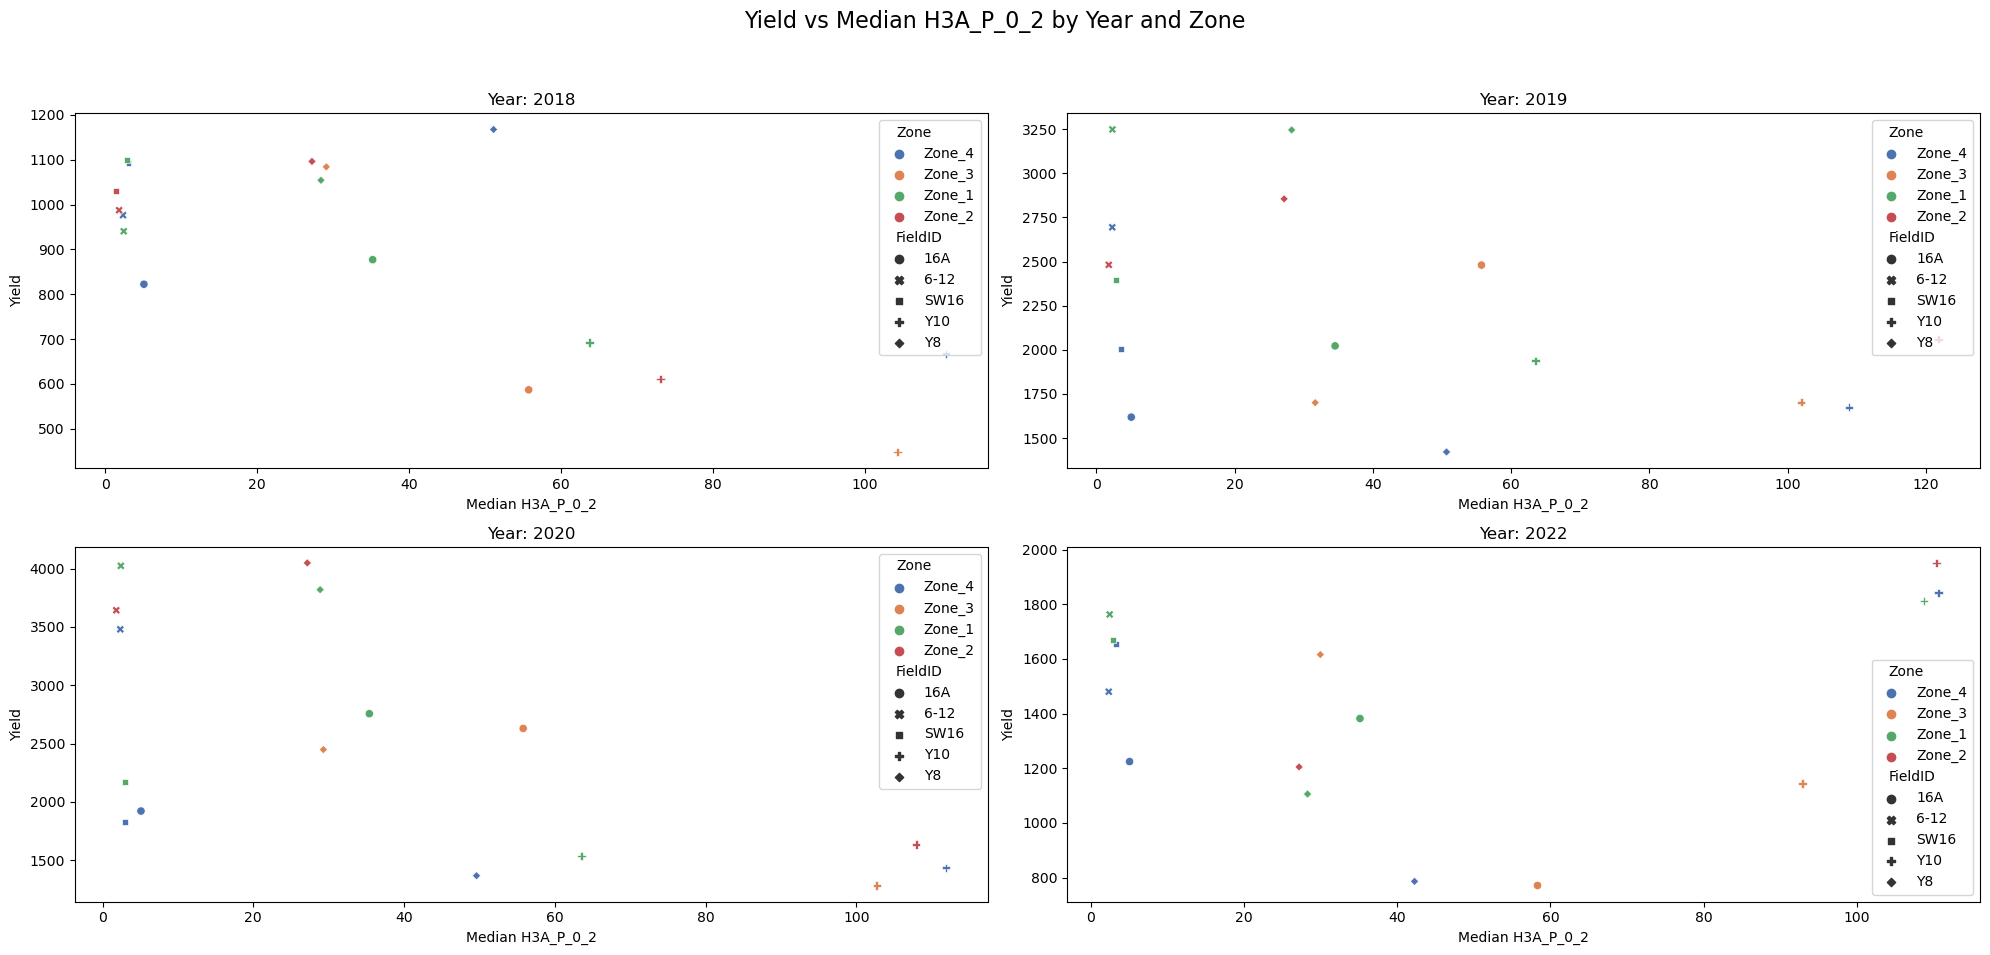

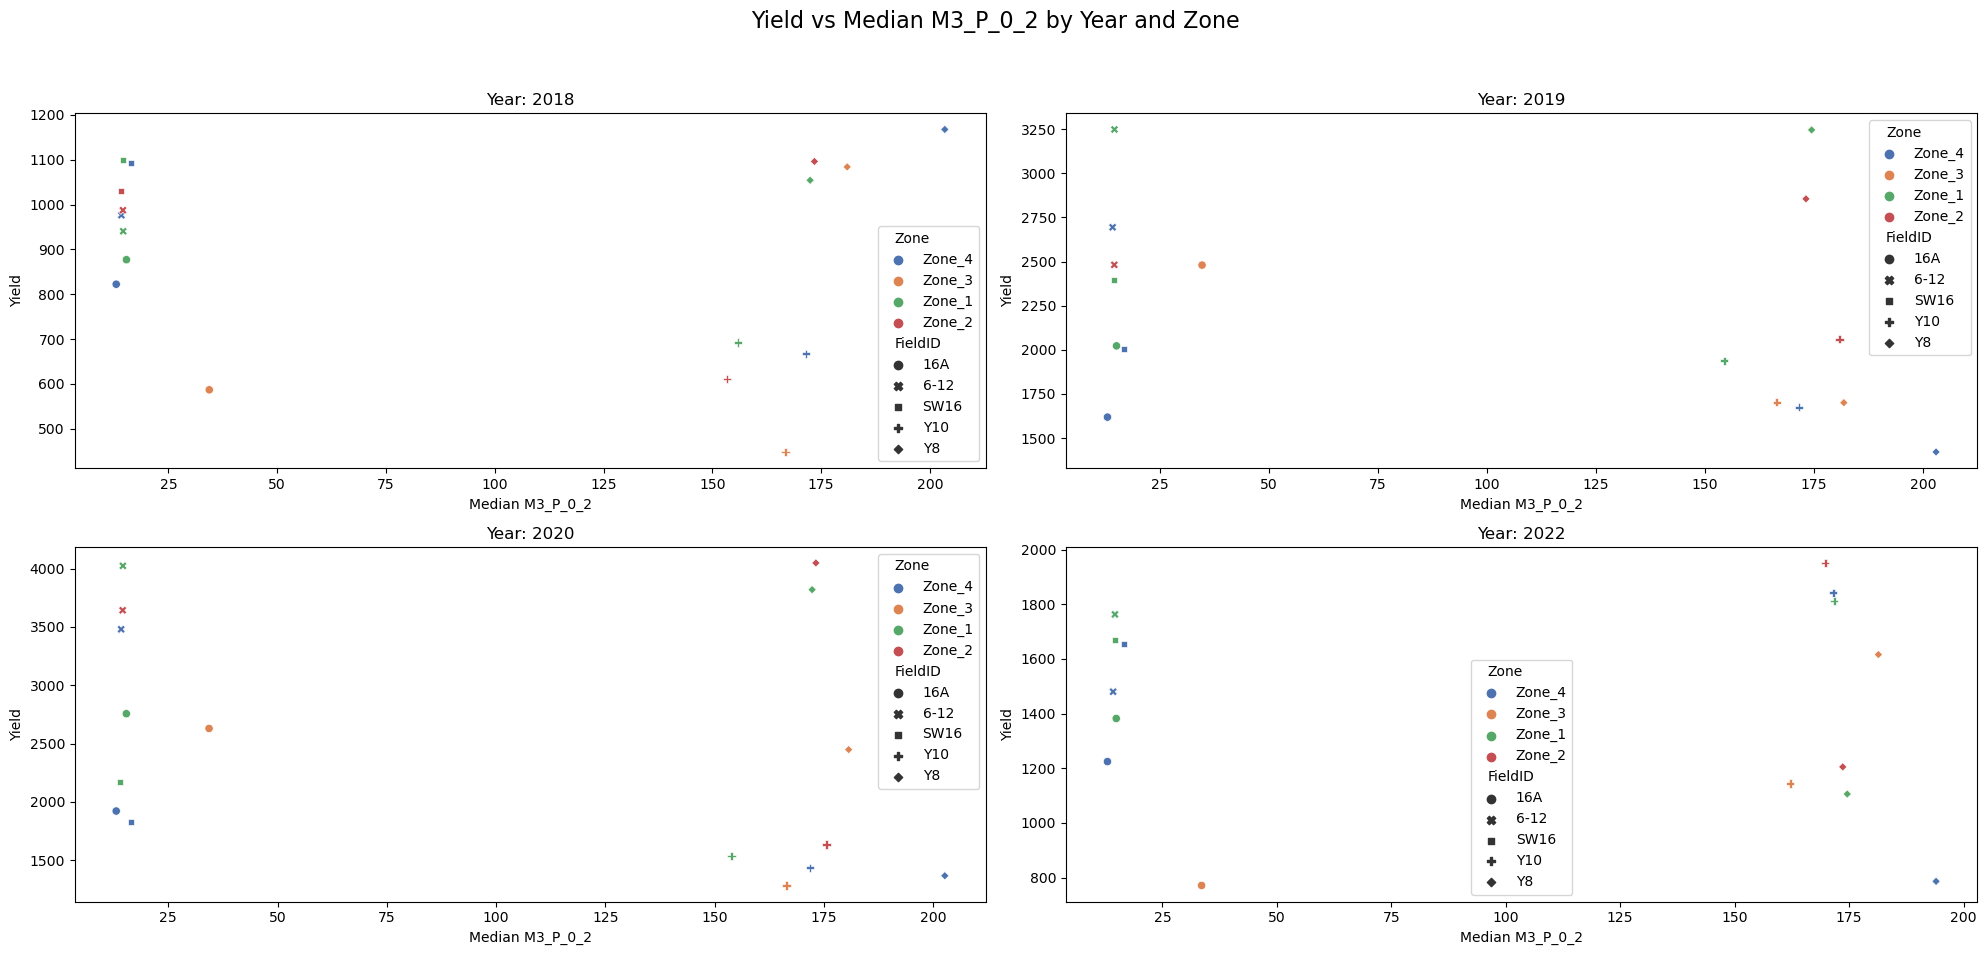

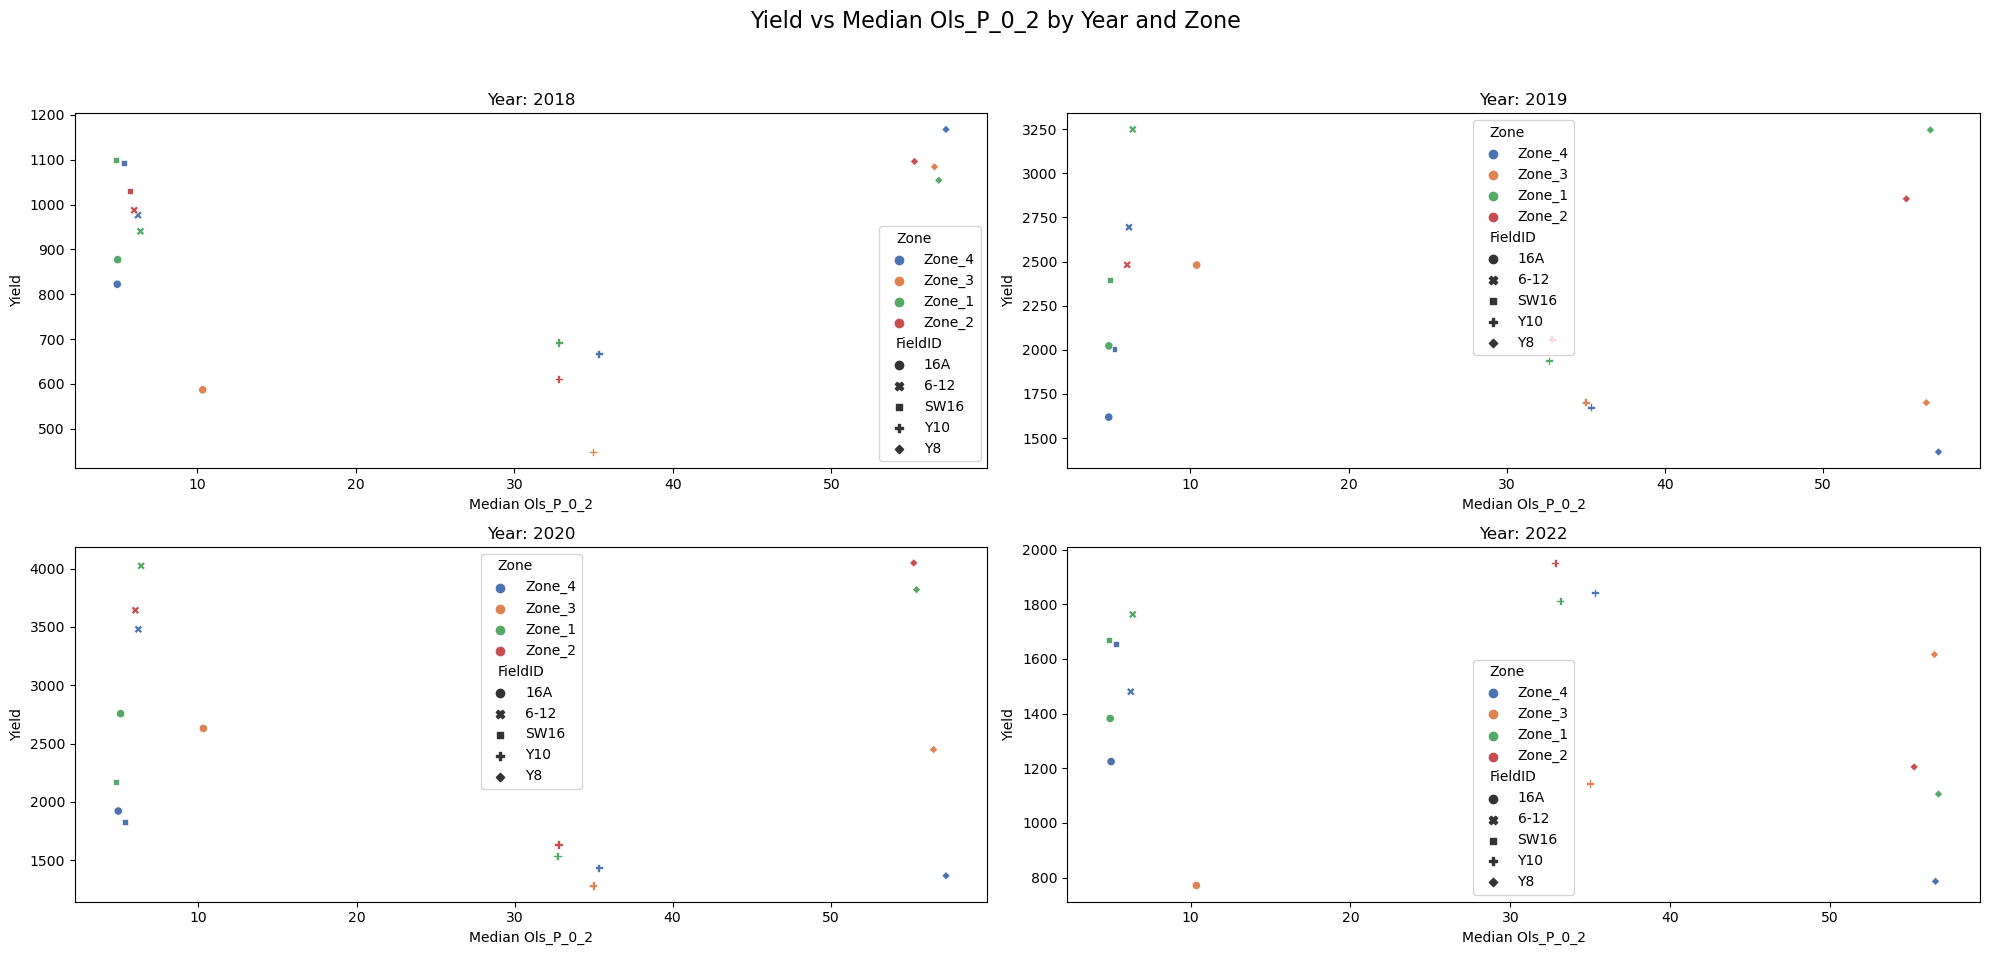

In [6]:
# List of soil test P values to plot
soil_tests = ['H3A_P_0_2', 'M3_P_0_2', 'Ols_P_0_2']

# Group by Year, FieldID, Zone and calculate the median
grouped = df.groupby(['Year', 'FieldID', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4'])[soil_tests + ['Yield']].median().reset_index()

# Creating a column for zone as a single value
grouped['Zone'] = grouped[['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']].idxmax(axis=1)

# Plotting
for test in soil_tests:
    # Create a figure for each soil test
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Yield vs Median {test} by Year and Zone", fontsize=16)

    # Getting unique years for subplots
    years = df['Year'].unique()
    for i, year in enumerate(years, 1):
        # Create a subplot for each year
        plt.subplot(2, 2, i)
        sns.scatterplot(x=grouped[grouped['Year'] == year][test], 
                        y=grouped[grouped['Year'] == year]['Yield'],
                        hue=grouped[grouped['Year'] == year]['Zone'],
                        style=grouped[grouped['Year'] == year]['FieldID'],
                        palette='deep')
        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Yield")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

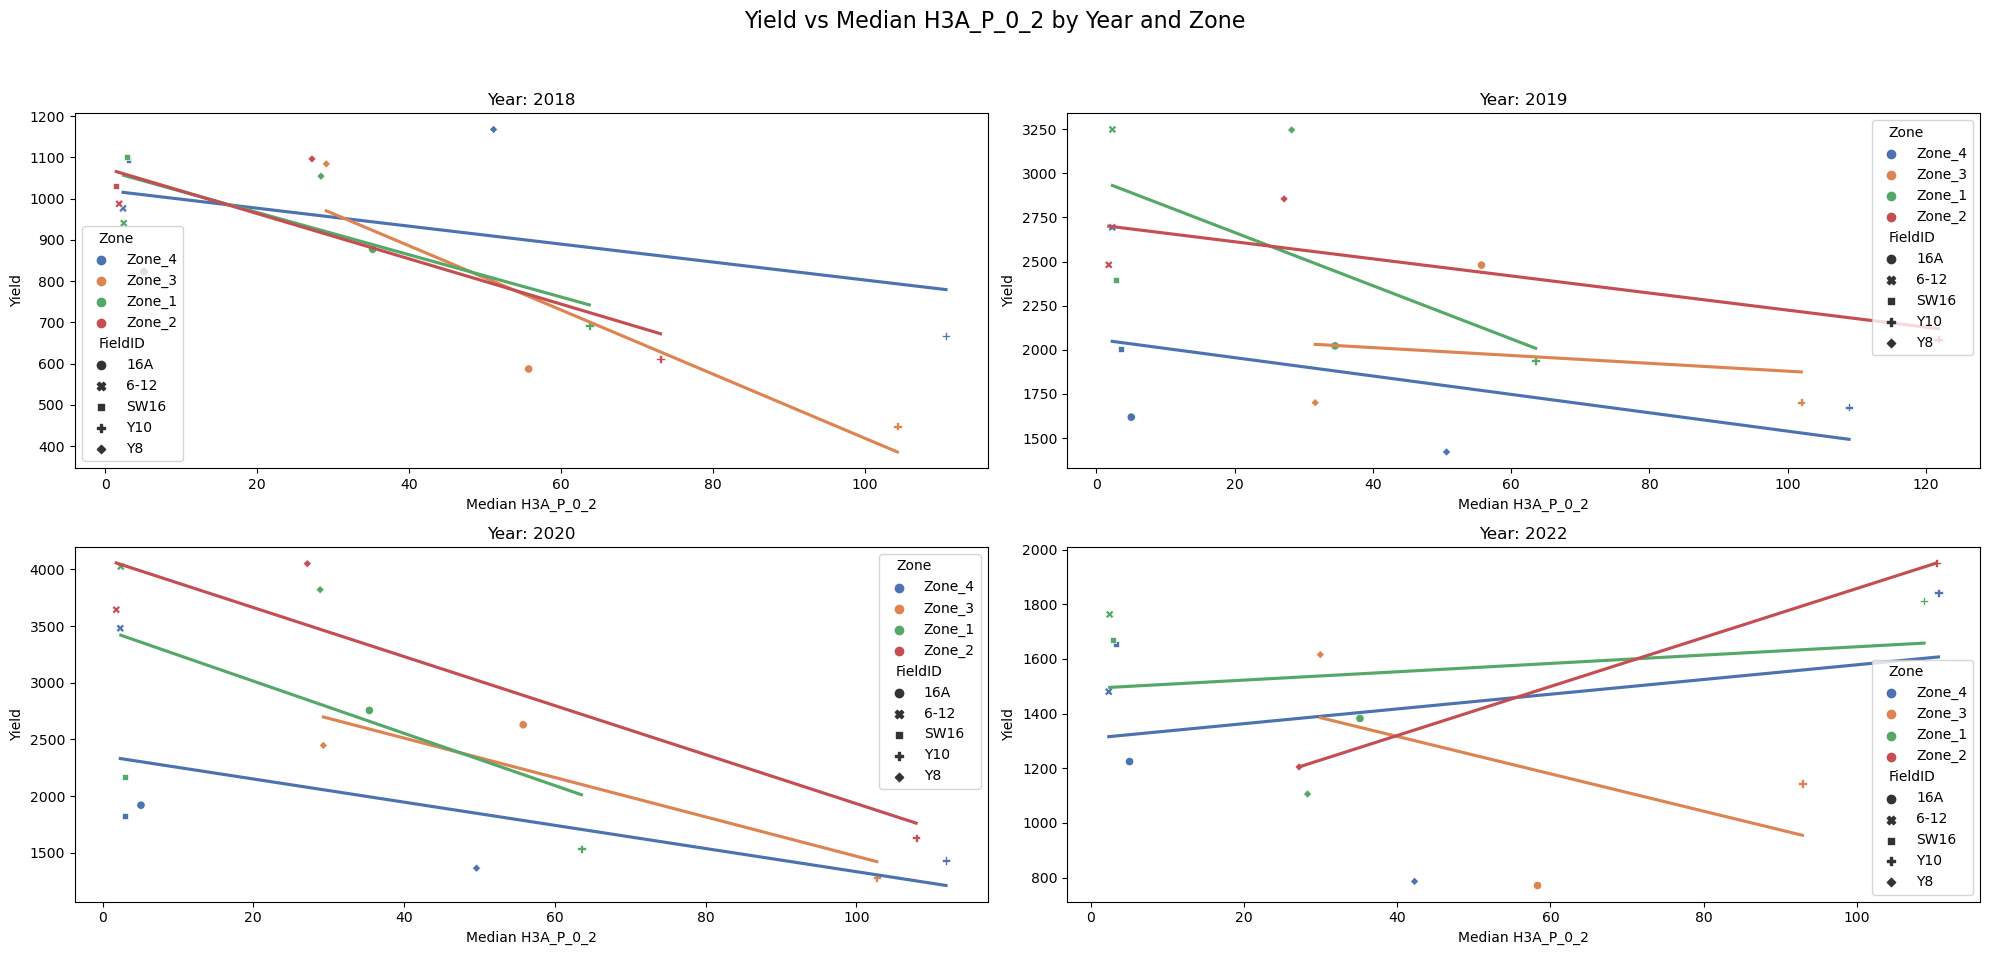

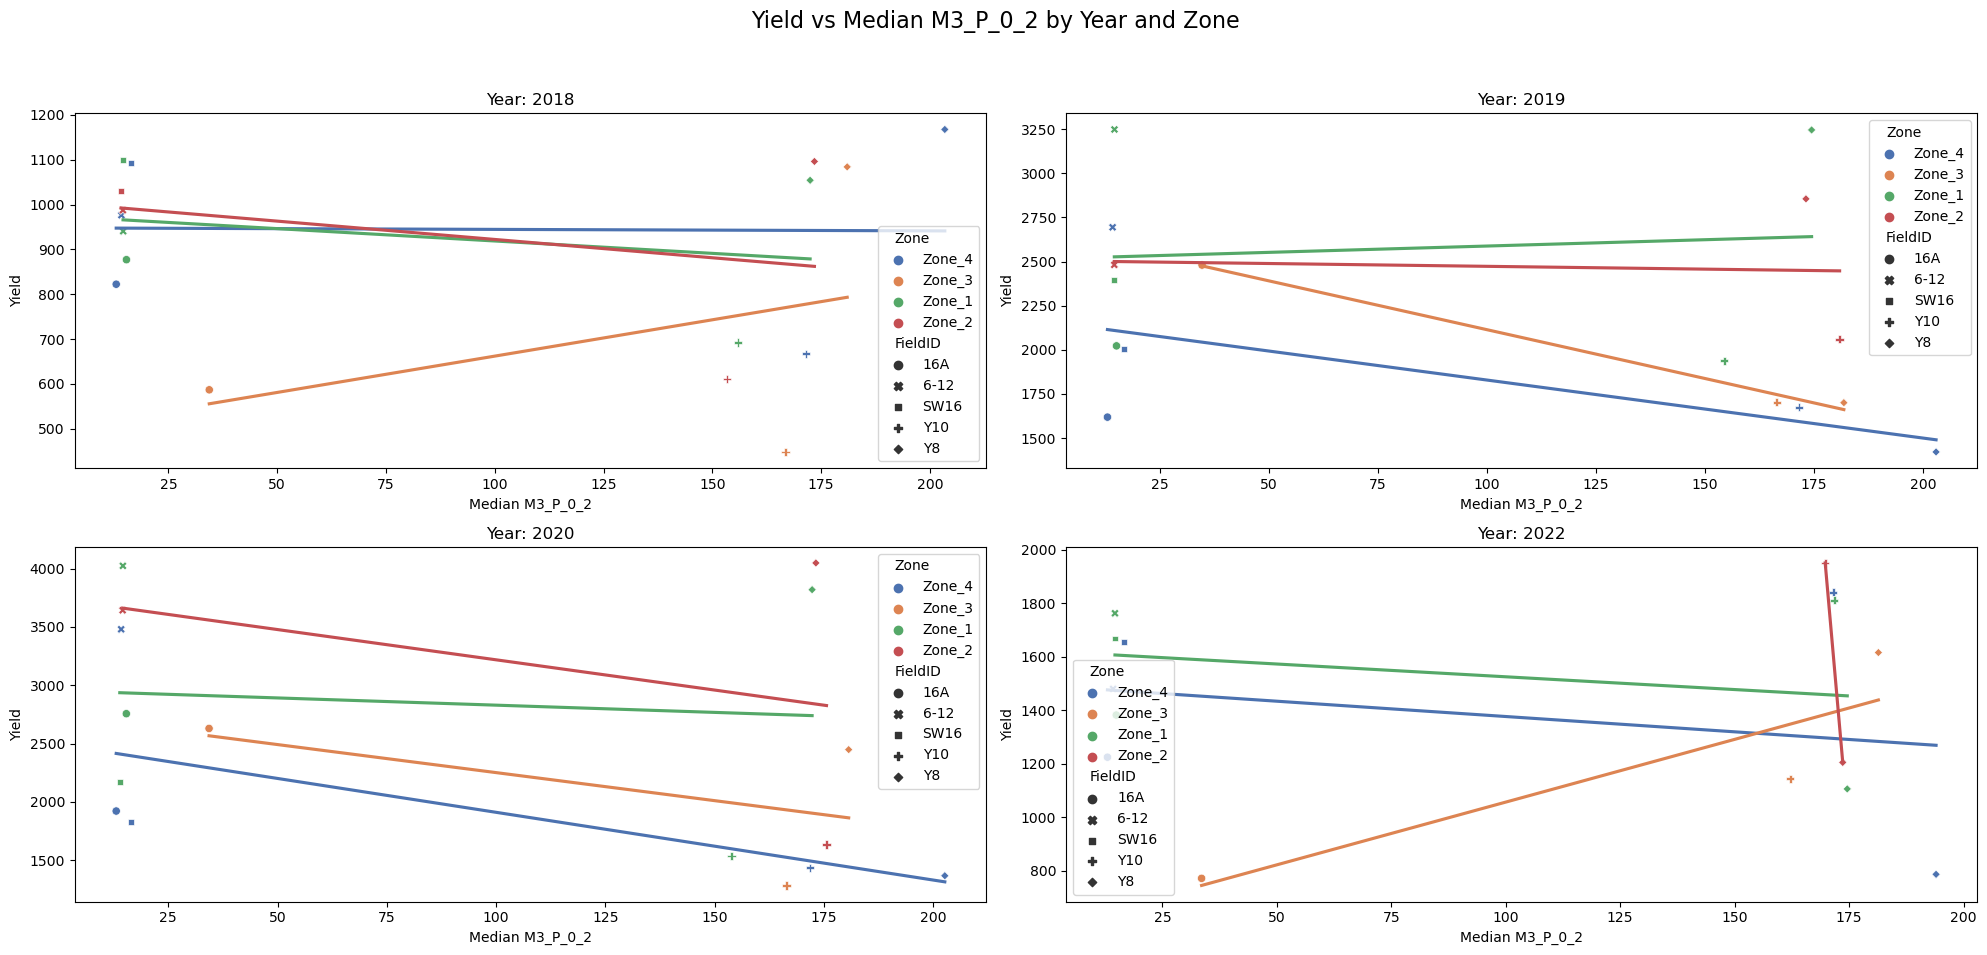

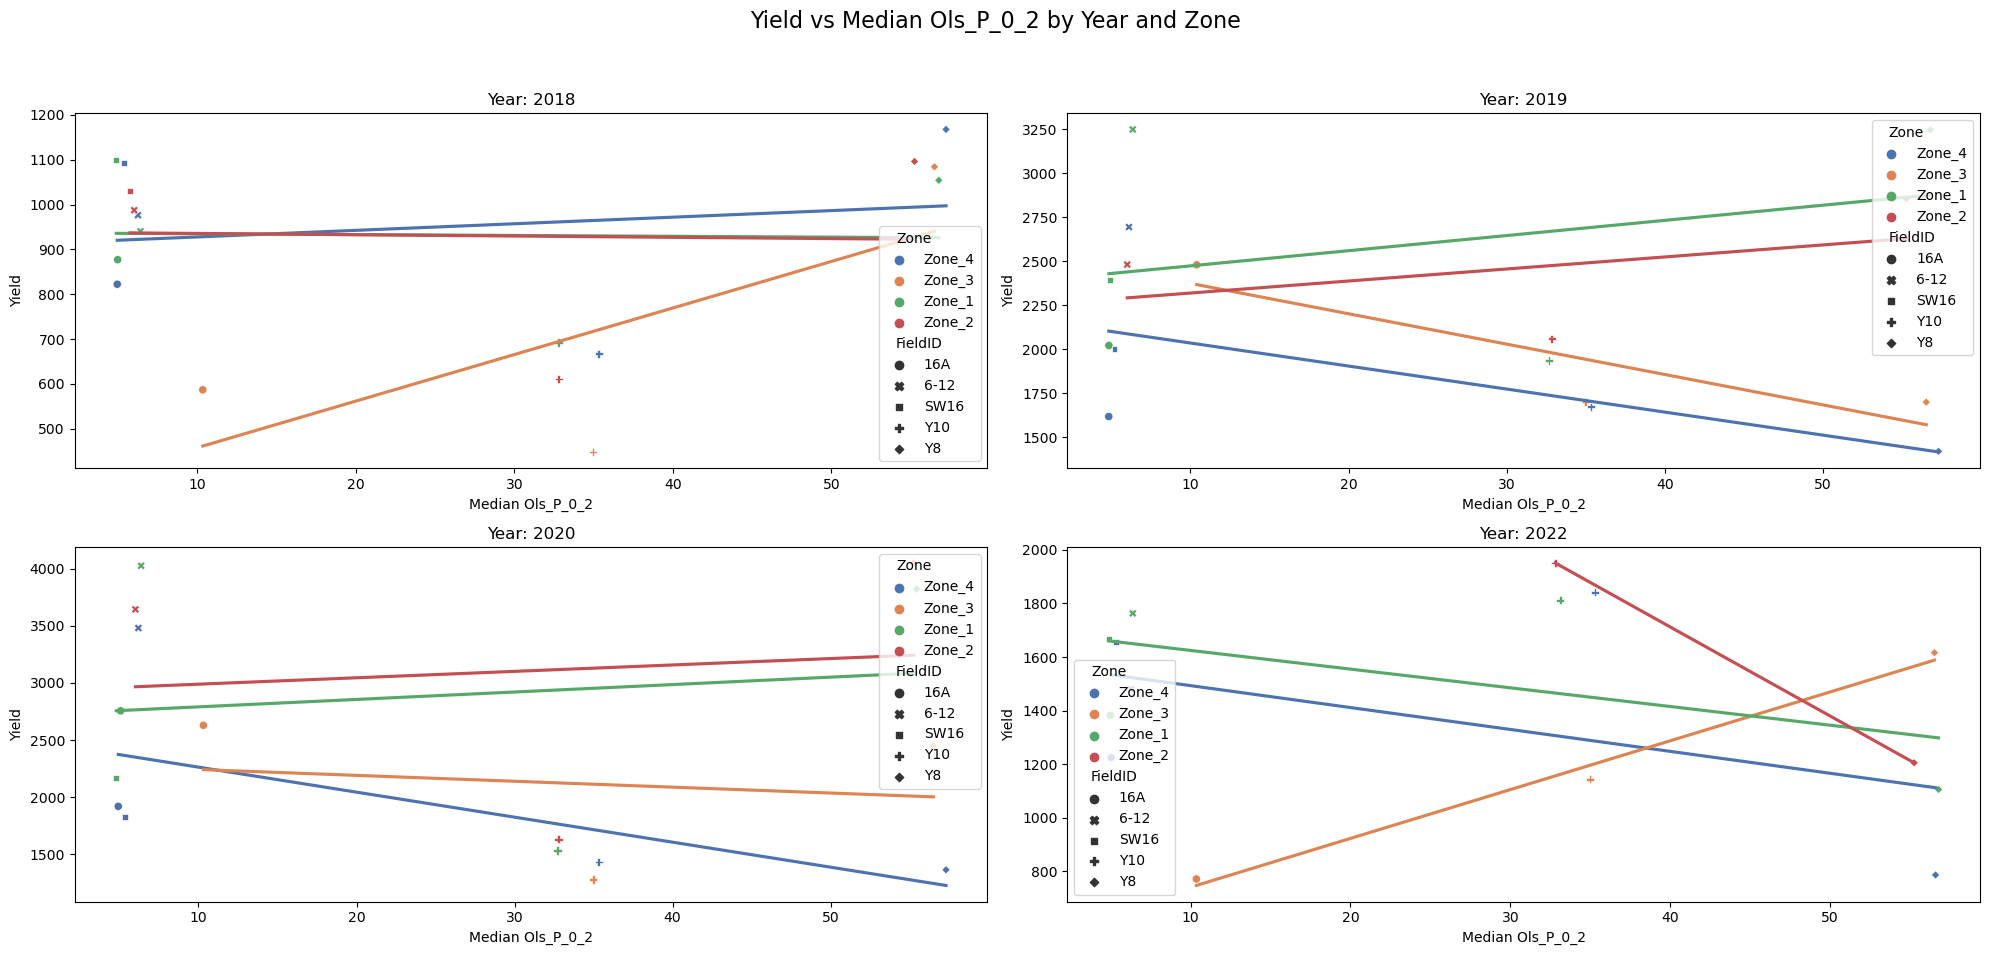

In [7]:
# Plotting
for test in soil_tests:
    # Create a figure for each soil test
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Yield vs Median {test} by Year and Zone", fontsize=16)

    # Getting unique years for subplots
    years = df['Year'].unique()
    for i, year in enumerate(years, 1):
        ax = plt.subplot(2, 2, i)
        # Scatter plot
        sns.scatterplot(x=grouped[grouped['Year'] == year][test], 
                        y=grouped[grouped['Year'] == year]['Yield'],
                        hue=grouped[grouped['Year'] == year]['Zone'],
                        style=grouped[grouped['Year'] == year]['FieldID'],
                        palette='deep', ax=ax)

        # Add regression lines for each zone
        zones = grouped['Zone'].unique()
        for zone in zones:
            zone_data = grouped[(grouped['Year'] == year) & (grouped['Zone'] == zone)]
            sns.regplot(x=test, y='Yield', data=zone_data, scatter=False, ax=ax, 
                        color=sns.color_palette('deep')[list(zones).index(zone)], ci = False)

        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Yield")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

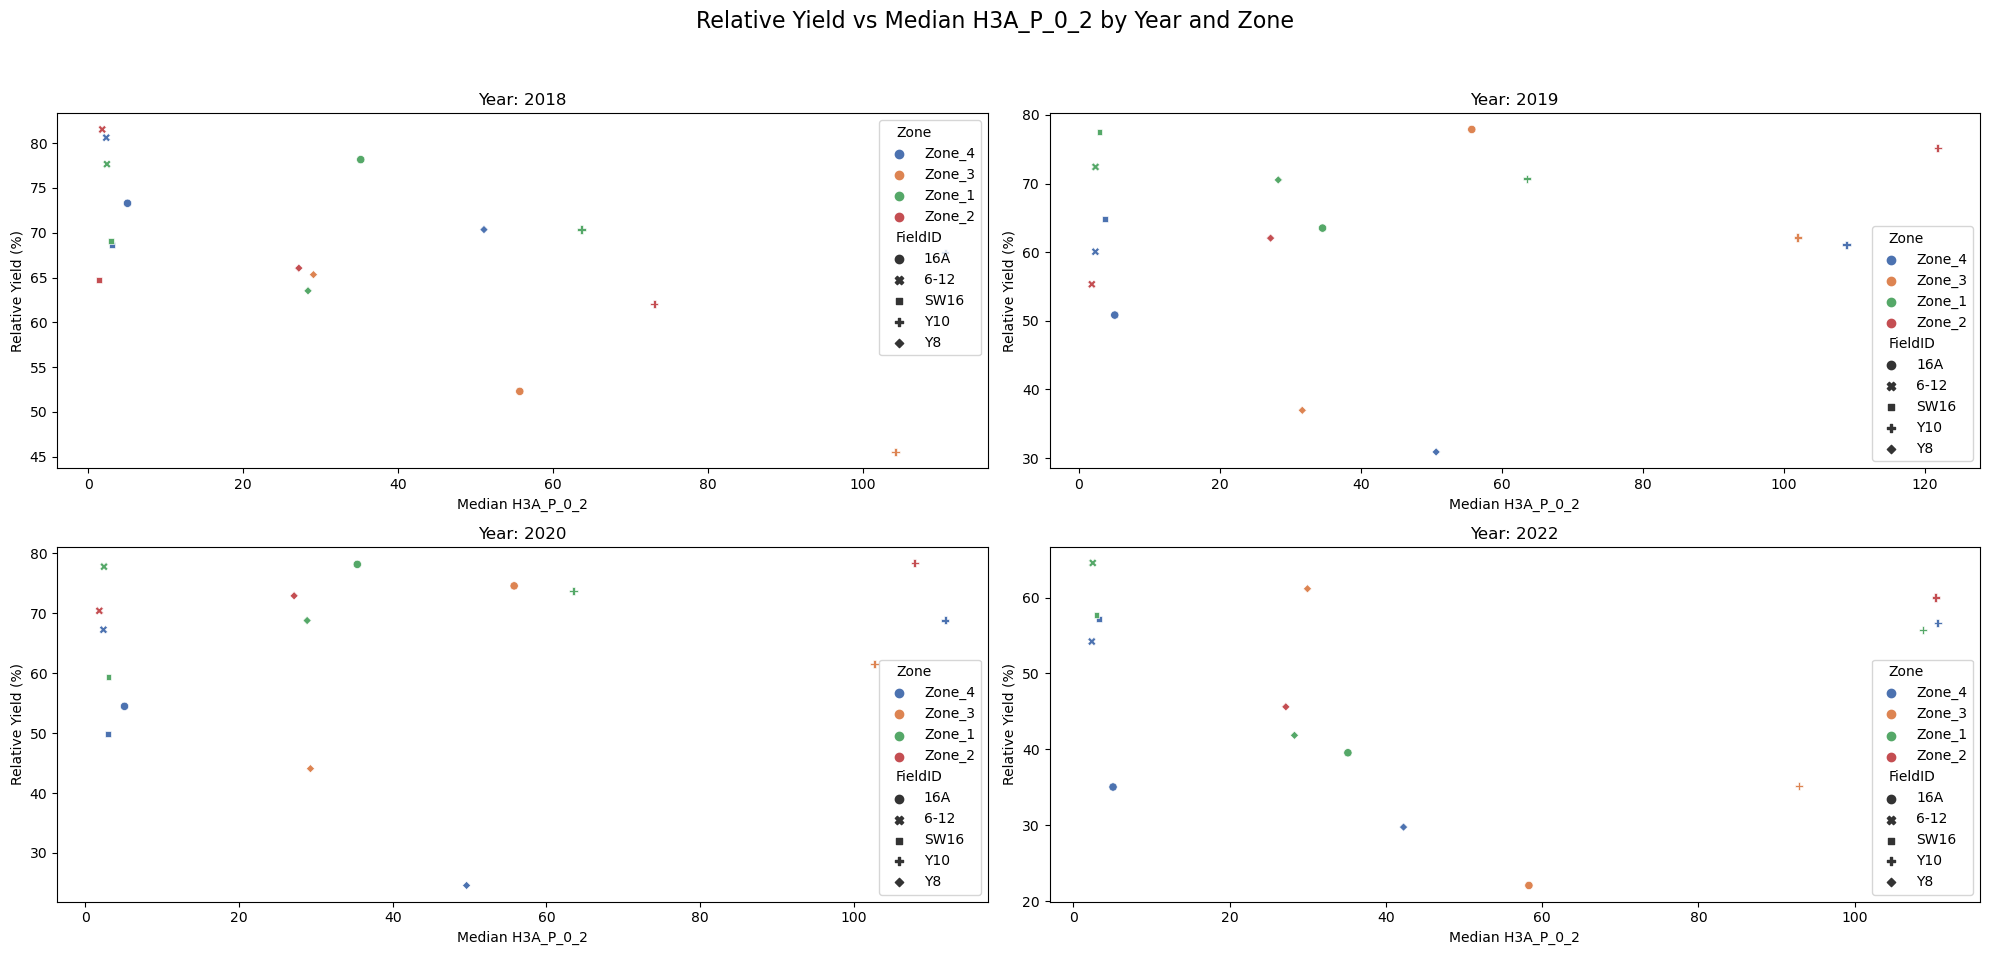

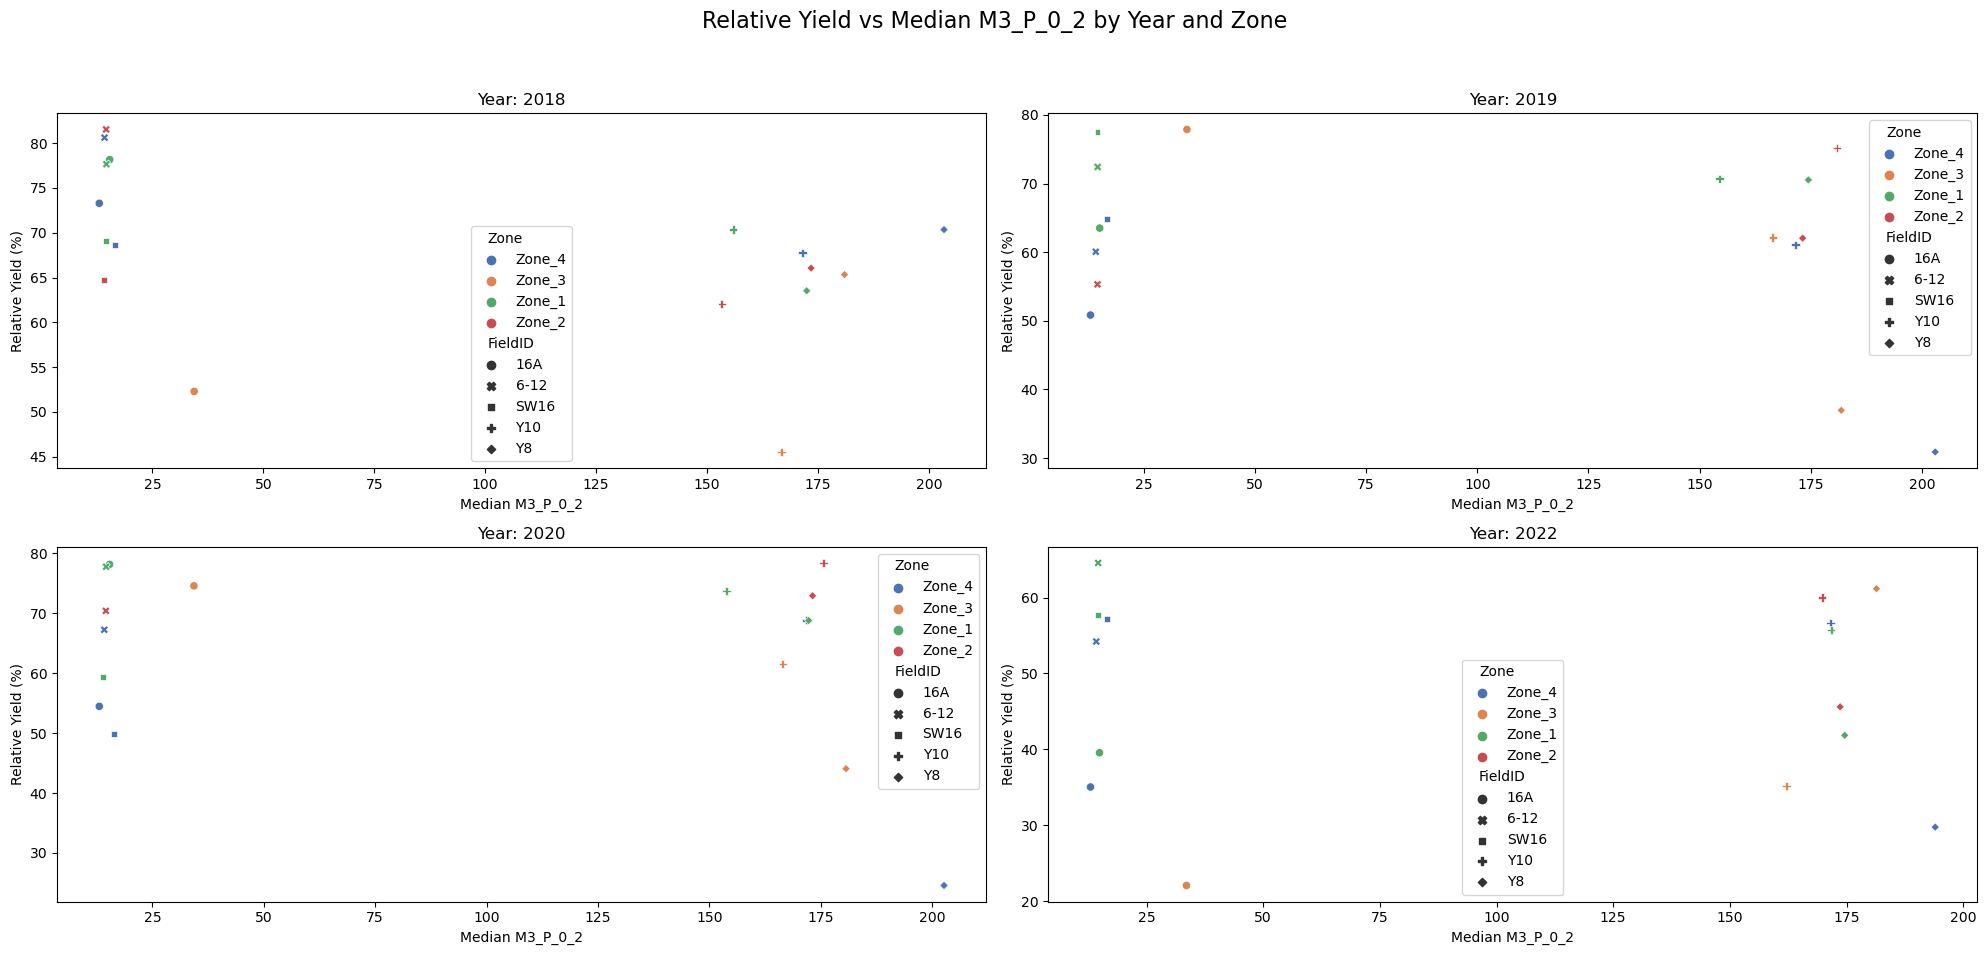

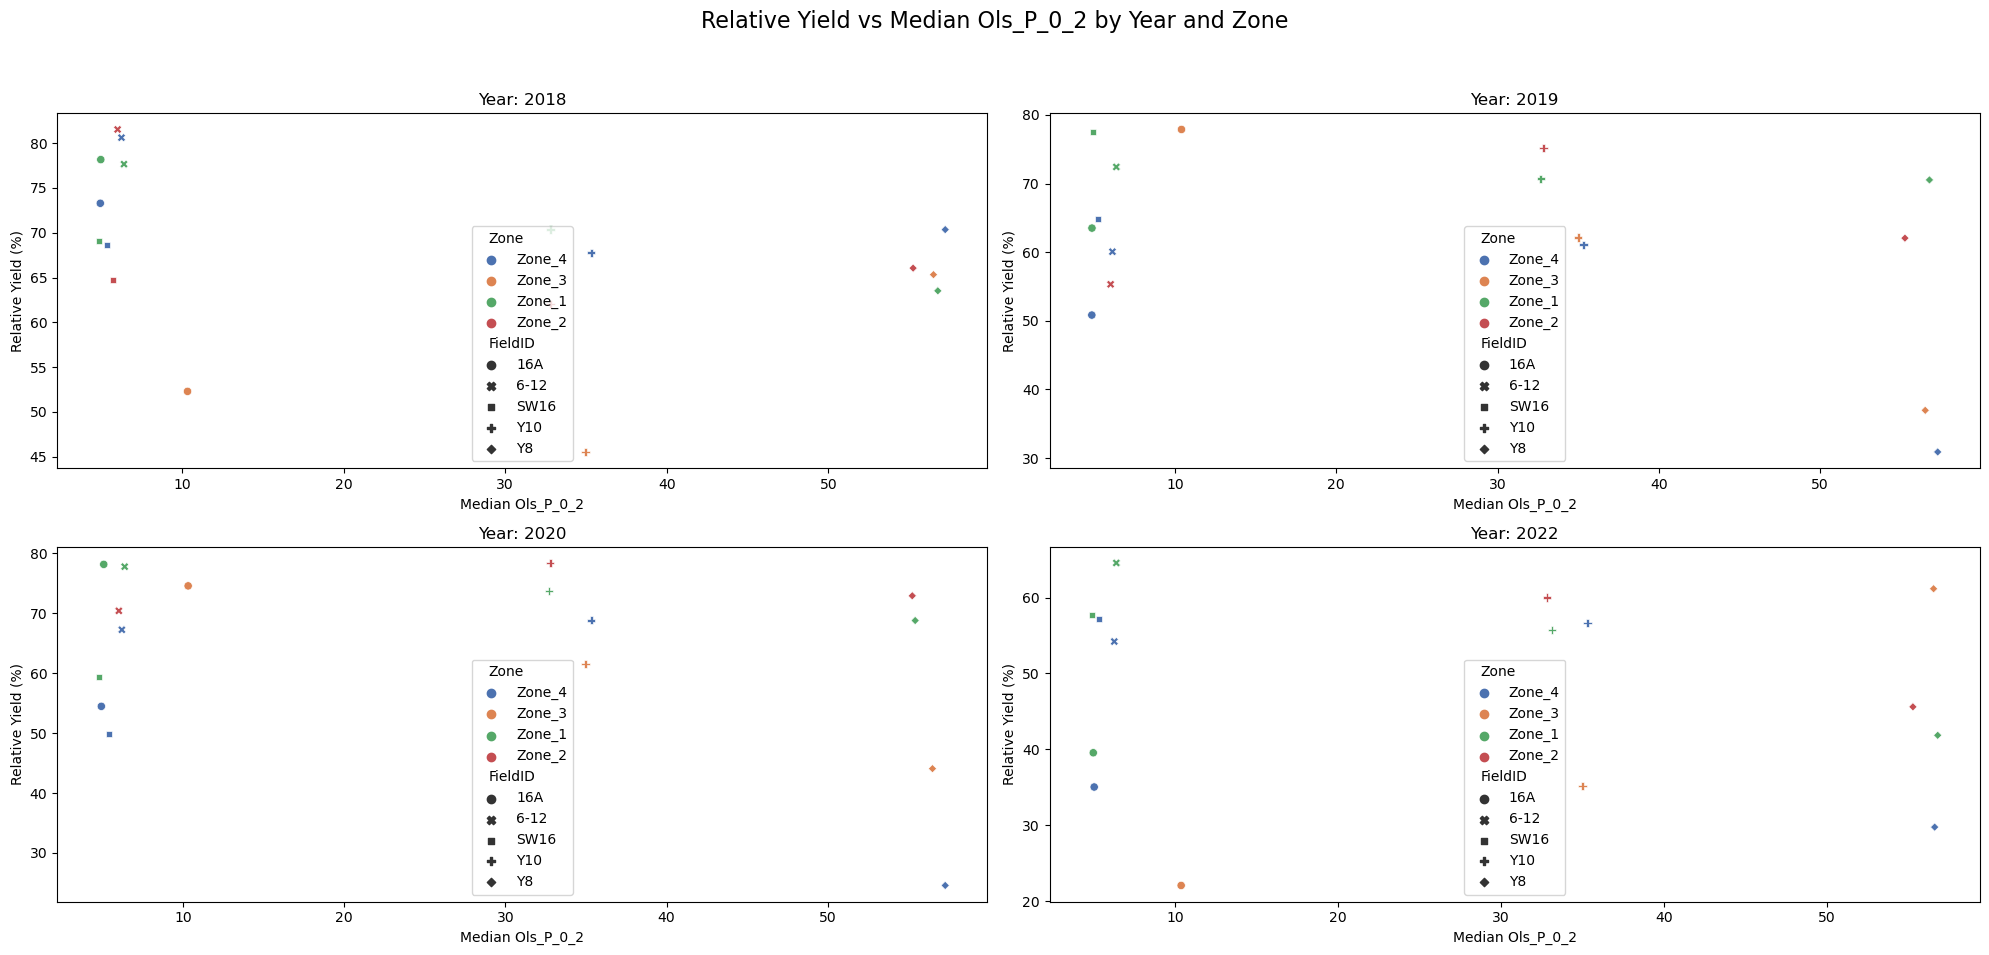

In [8]:
# Calculate maximum yield for each year and field
max_yield = df.groupby(['Year', 'FieldID'])['Yield'].max().reset_index()
max_yield.rename(columns={'Yield': 'Max_Yield'}, inplace=True)

# Merge back to the original dataframe to get the maximum yield for each record
df = pd.merge(df, max_yield, on=['Year', 'FieldID'])

# Calculate relative yield as a percentage of the maximum yield
df['Relative_Yield'] = (df['Yield'] / df['Max_Yield']) * 100

# List of soil test P values to plot
soil_tests = ['H3A_P_0_2', 'M3_P_0_2', 'Ols_P_0_2']

# Group by Year, FieldID, Zone and calculate the median for soil tests and relative yield
grouped = df.groupby(['Year', 'FieldID', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4'])[soil_tests + ['Relative_Yield']].median().reset_index()

# Creating a column for zone as a single value
grouped['Zone'] = grouped[['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']].idxmax(axis=1)

# Plotting
for test in soil_tests:
    # Create a figure for each soil test
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Relative Yield vs Median {test} by Year and Zone", fontsize=16)

    # Getting unique years for subplots
    years = df['Year'].unique()
    for i, year in enumerate(years, 1):
        # Create a subplot for each year
        plt.subplot(2, 2, i)
        sns.scatterplot(x=grouped[grouped['Year'] == year][test], 
                        y=grouped[grouped['Year'] == year]['Relative_Yield'],
                        hue=grouped[grouped['Year'] == year]['Zone'],
                        style=grouped[grouped['Year'] == year]['FieldID'],
                        palette='deep')
        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Relative Yield (%)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

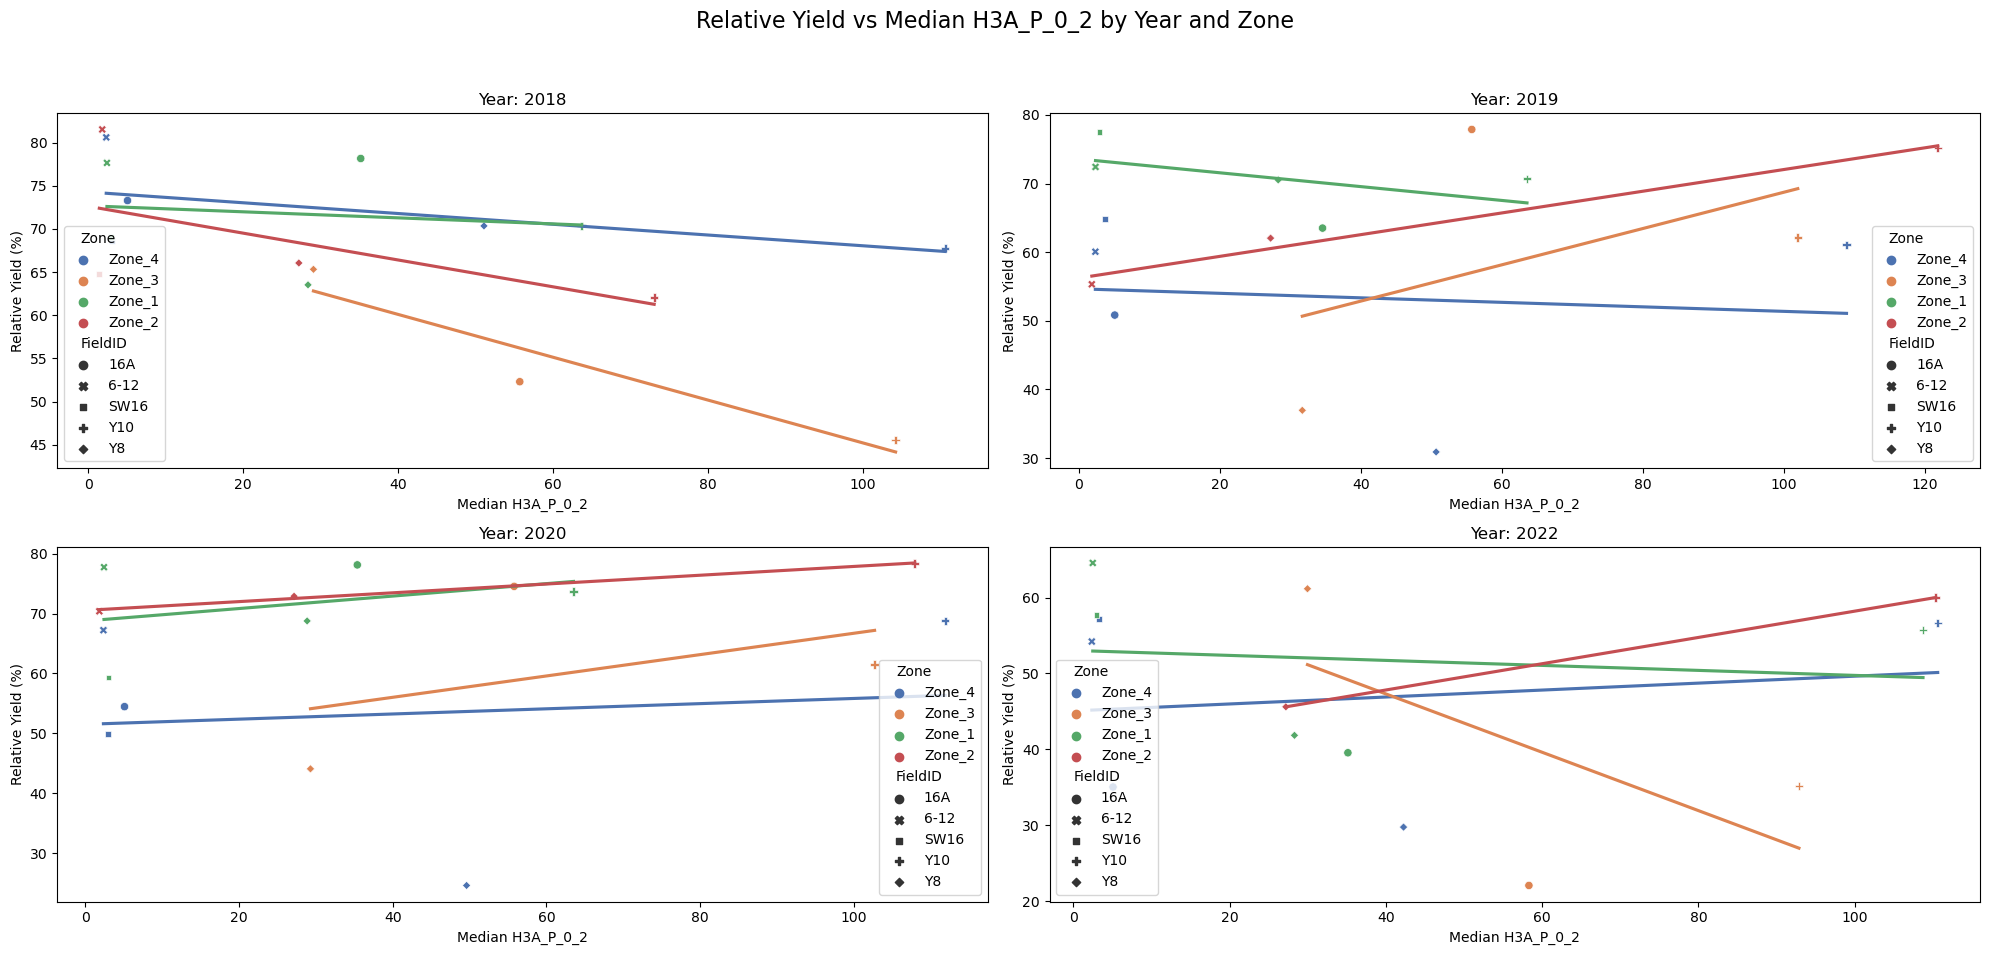

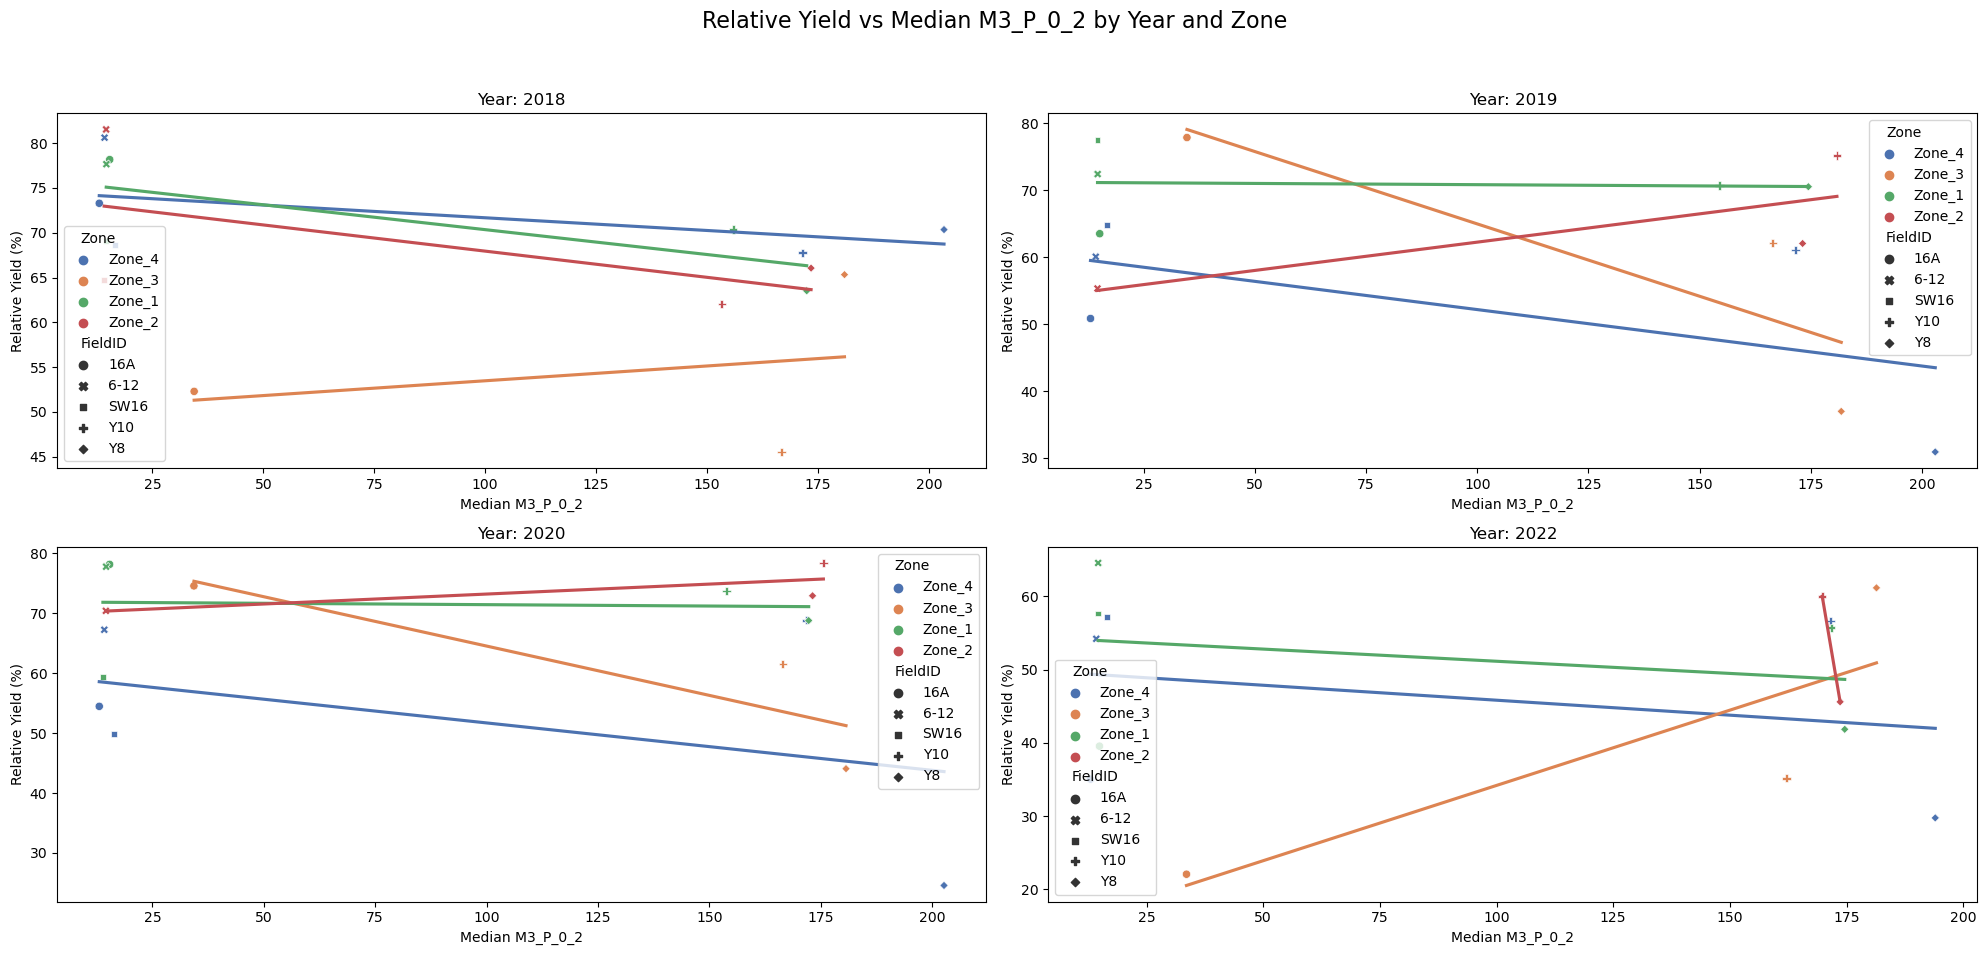

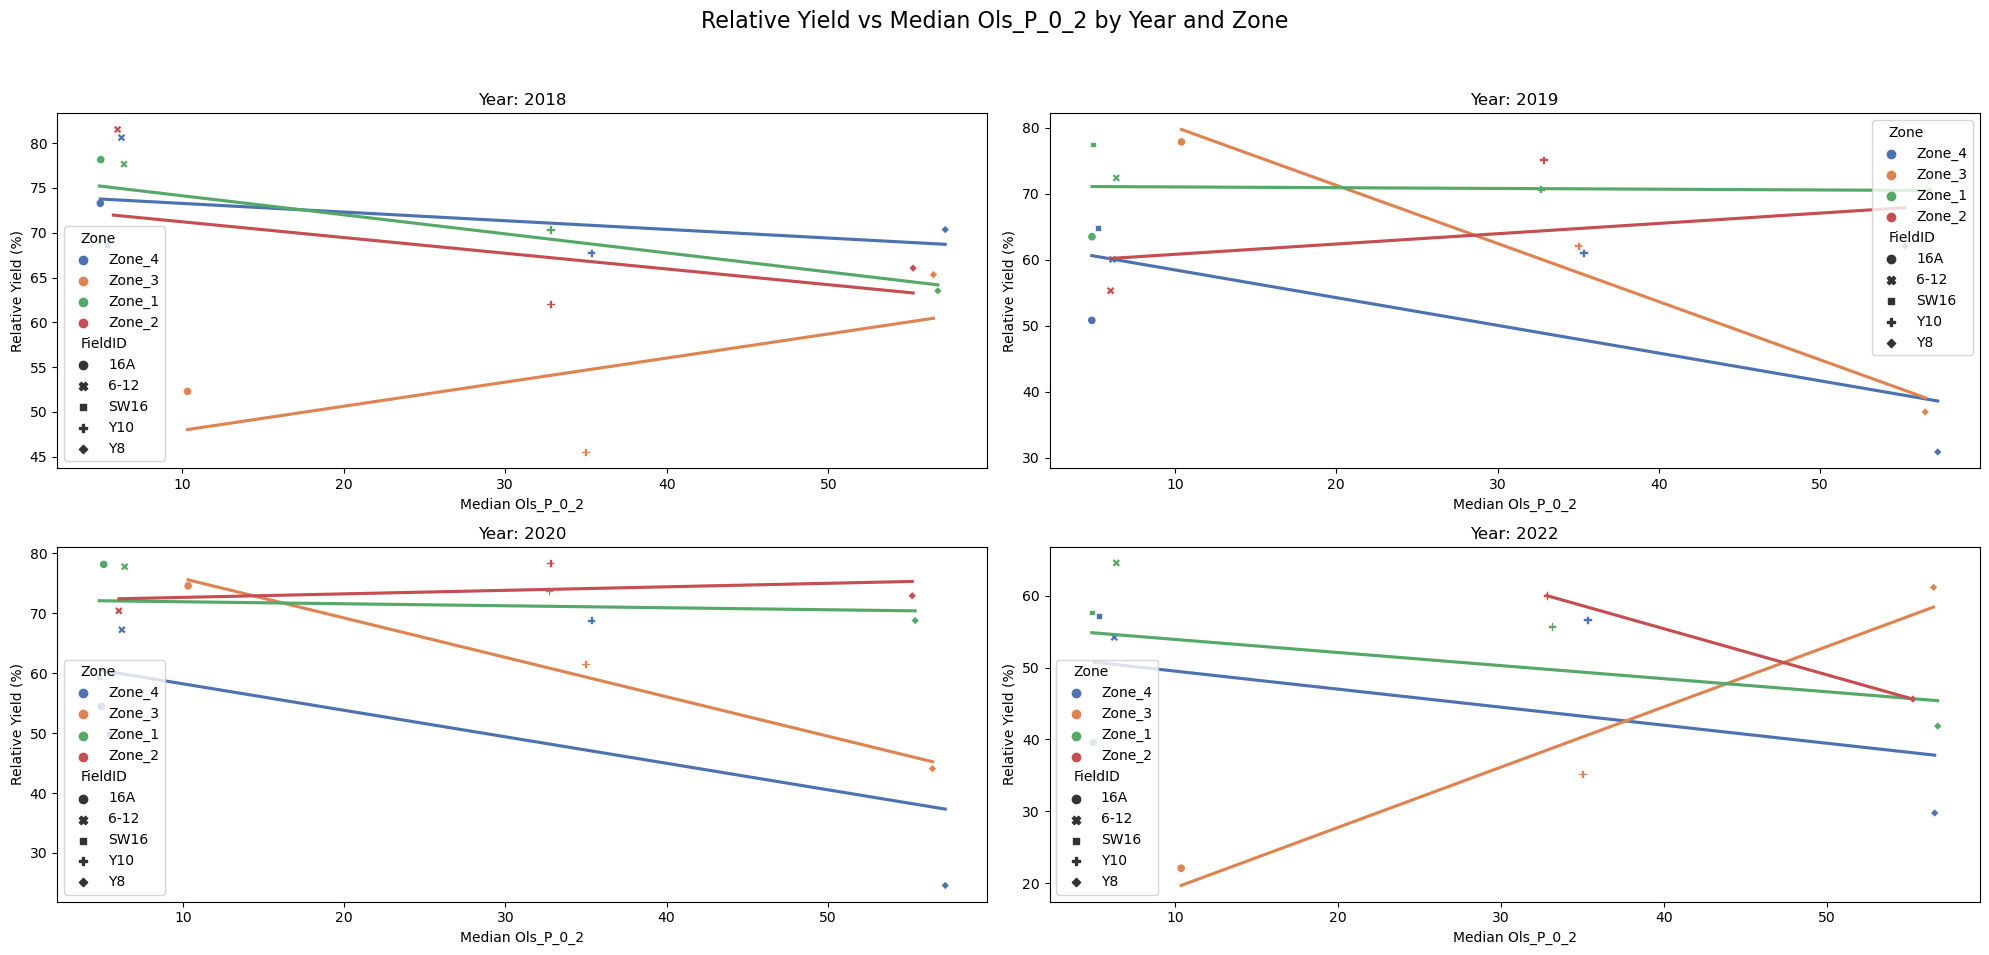

In [10]:
# Calculate maximum yield for each year and field
max_yield = df.groupby(['Year', 'FieldID'])['Yield'].max().reset_index()
max_yield.rename(columns={'Yield': 'Max_Yield'}, inplace=True)

# Merge back to the original dataframe to get the maximum yield for each record
df = pd.merge(df, max_yield, on=['Year', 'FieldID'])

# Calculate relative yield as a percentage of the maximum yield
df['Relative_Yield'] = (df['Yield'] / df['Max_Yield']) * 100

# List of soil test P values to plot
soil_tests = ['H3A_P_0_2', 'M3_P_0_2', 'Ols_P_0_2']

# Group by Year, FieldID, Zone and calculate the median for soil tests and relative yield
grouped = df.groupby(['Year', 'FieldID', 'Zone_1', 'Zone_2', 'Zone_3', 'Zone_4'])[soil_tests + ['Relative_Yield']].median().reset_index()

# Creating a column for zone as a single value
grouped['Zone'] = grouped[['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']].idxmax(axis=1)

# Plotting
for test in soil_tests:
    # Create a figure for each soil test
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Relative Yield vs Median {test} by Year and Zone", fontsize=16)

    # Getting unique years for subplots
    years = df['Year'].unique()
    for i, year in enumerate(years, 1):
        ax = plt.subplot(2, 2, i)
        # Scatter plot
        sns.scatterplot(x=grouped[grouped['Year'] == year][test], 
                        y=grouped[grouped['Year'] == year]['Relative_Yield'],
                        hue=grouped[grouped['Year'] == year]['Zone'],
                        style=grouped[grouped['Year'] == year]['FieldID'],
                        palette='deep', ax=ax)

        # Add regression lines for each zone
        zones = grouped['Zone'].unique()
        for zone in zones:
            zone_data = grouped[(grouped['Year'] == year) & (grouped['Zone'] == zone)]
            sns.regplot(x=test, y='Relative_Yield', data=zone_data, scatter=False, ax=ax, 
                        color=sns.color_palette('deep')[list(zones).index(zone)], ci = False)

        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Relative Yield (%)")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Figures for relative yield, as compared to control plots

In [11]:
df = pd.read_csv("Data/Interpolated_soil_combined/combined_zones.csv")
print(len(df[((df['FieldID'] == 'SW16') & (df['Zone_2'] == 1) & (df['PhosphorusTreatment'] > 0))]))
#Removing Zone 2 from SW16 because there are only four points
df = df[~((df['FieldID'] == 'SW16') & (df['Zone_2'] == 1))]

4


In [12]:
df.head()

,Longitude,Latitude,Yield,Moisture,PlotID,FieldID,elevation,slope,aspect,TOC_0_2,...,Ols_Fe_2_6,Ols_K_2_6,Ols_Mg_2_6,Ols_P_2_6,Zone_1,Zone_2,Zone_3,Zone_4,Year,PhosphorusTreatment
0,-96.892941,31.483354,40.515,11.4,1,16A,166.490997,1.157570,317.295013,180.744995,...,1.51316,180.636993,47.700500,3.37854,1,0,0,0,2018,0.0
1,-96.892969,31.483341,37.996,11.4,1,16A,166.436005,1.416990,271.201996,180.986999,...,1.51314,180.434006,47.864399,3.39090,1,0,0,0,2018,0.0
2,-96.892998,31.483327,35.419,11.4,1,16A,166.399994,0.895217,335.101990,181.264008,...,1.51306,180.188004,48.057899,3.40233,1,0,0,0,2018,0.0
3,-96.893026,31.483313,30.118,11.4,1,16A,166.356995,1.657170,277.367004,181.531998,...,1.51299,179.962997,48.244701,3.41356,1,0,0,0,2018,0.0
4,-96.893054,31.483299,26.151,11.4,1,16A,166.322006,1.125890,290.787994,181.753006,...,1.51297,179.815994,48.374199,3.42438,1,0,0,0,2018,0.0


In [13]:
# Create a copy of df
df_copy = df.copy()

df_copy['PlotID'] = df_copy['PlotID'].astype(int)

# Control plot dictionaries for each field
control_dicts = {
    '16A': {3: [1, 4, 5], 6: [4, 5, 8], 7: [5, 8, 9], 10: [8, 9, 12], 11: [9, 12, 13], 14: [12, 13, 16], 15: [13, 16, 17], 18: [16, 17, 20], 19: [17, 20, 21]},
    '6-12': {4: [1, 5, 7], 6: [3, 5, 9], 8: [5, 7, 9], 10: [7, 11, 13], 12: [9, 11, 15], 14: [11, 13, 15], 16: [13, 17, 19], 18: [15, 17, 21], 20: [17, 19, 21]},
    'SW16': {1: [2, 4], 3: [2, 4, 6], 5: [4, 6, 8], 7: [6, 8, 10], 9: [8, 10, 12], 11: [10, 12, 14], 13: [12, 14, 16], 15: [14, 16, 18], 17: [16, 18]},
    'Y10': {3: [2, 4, 14], 5: [4, 6, 16], 7: [6, 8, 18], 9: [8, 10, 20], 13: [2, 12, 14], 15: [4, 14, 16], 17: [6, 16, 18], 19: [8, 18, 20], 21: [10, 20, 22]},
    'Y8': {5: [1, 6, 13], 7: [3, 6, 8], 10: [6, 9, 11], 12: [8, 11, 16], 13: [9, 14, 17], 15: [14, 16, 19], 18: [17, 19, 22], 20: [16, 19, 24], 21: [17, 22, 25], 23: [22, 24, 27], 26: [22, 25, 27], 28: [24, 27, 32]}
}

# Function to calculate average control yield
def calculate_control_avg(row, field_control_dict, yield_col, zone_cols):
    control_plots = field_control_dict.get(row['PlotID'], [])
    control_data = df_copy[(df_copy['PlotID'].isin(control_plots)) & 
                           (df_copy['FieldID'] == row['FieldID']) & 
                           (df_copy['Year'] == row['Year'])]
    for col in zone_cols:
        control_data = control_data[control_data[col] == row[col]]
    return control_data[yield_col].mean()

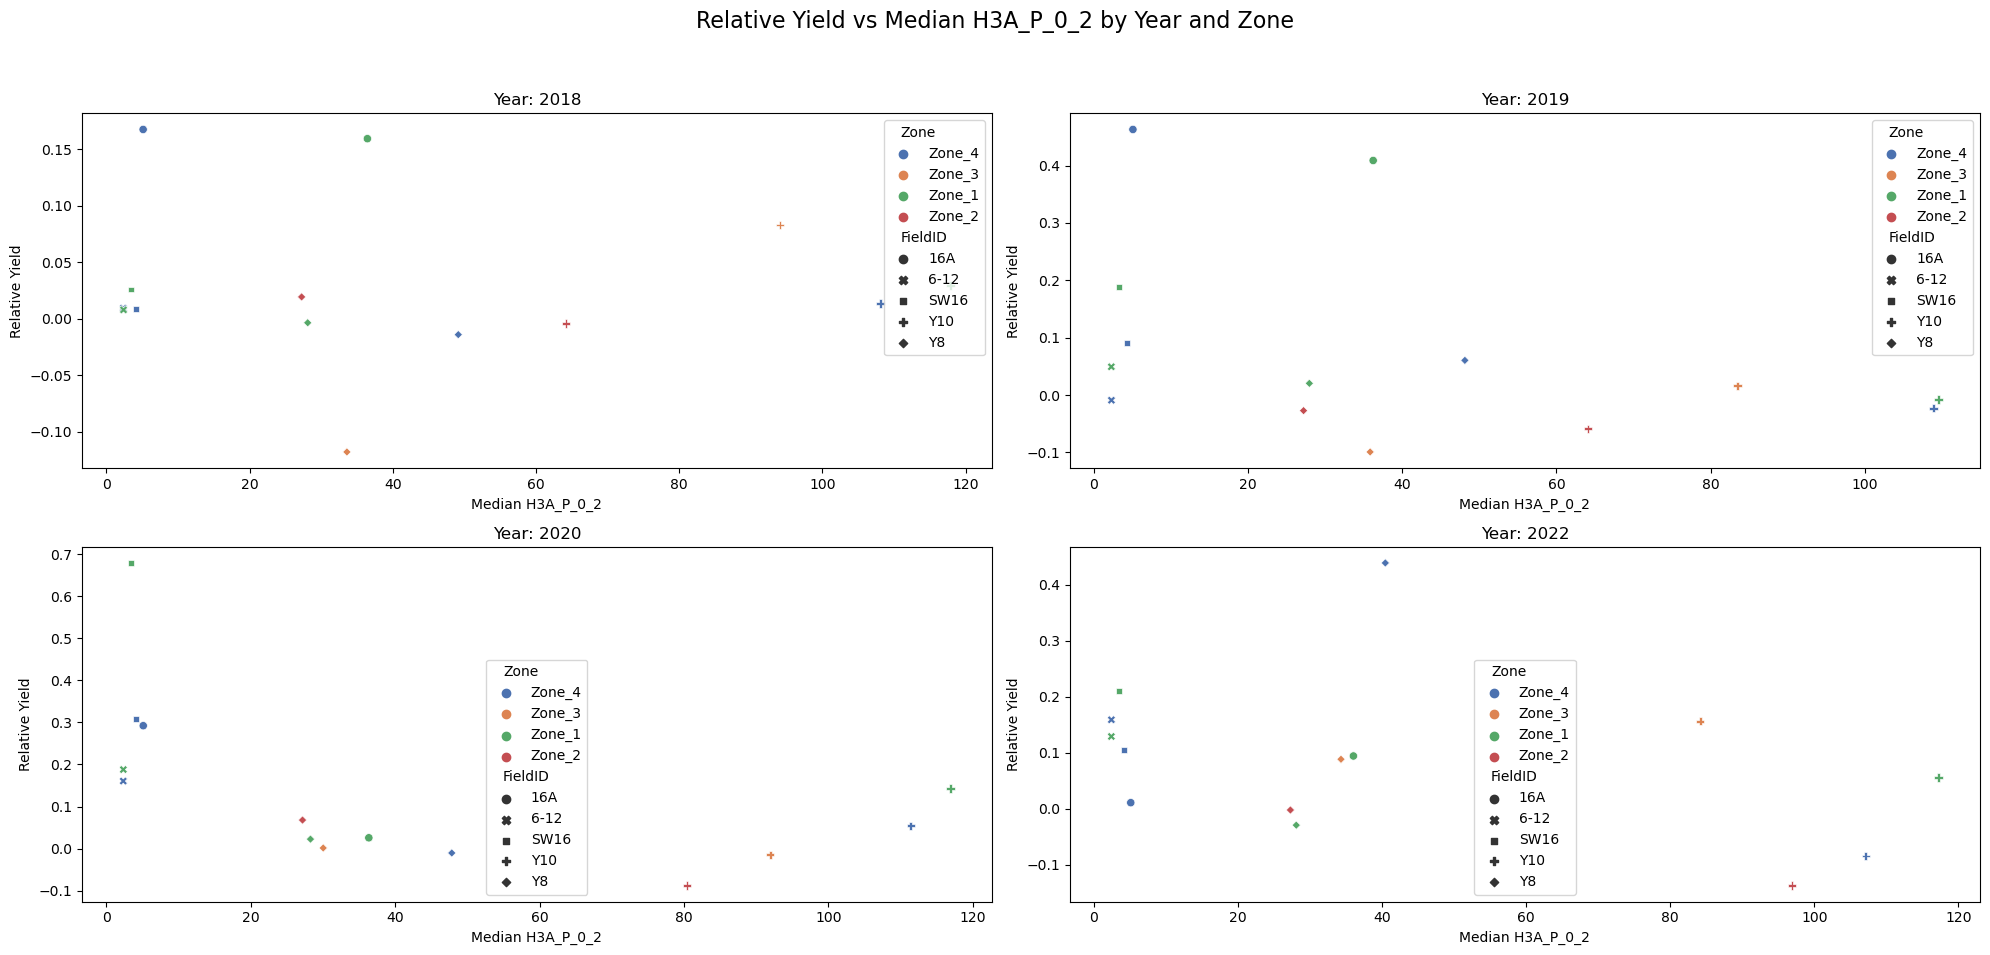

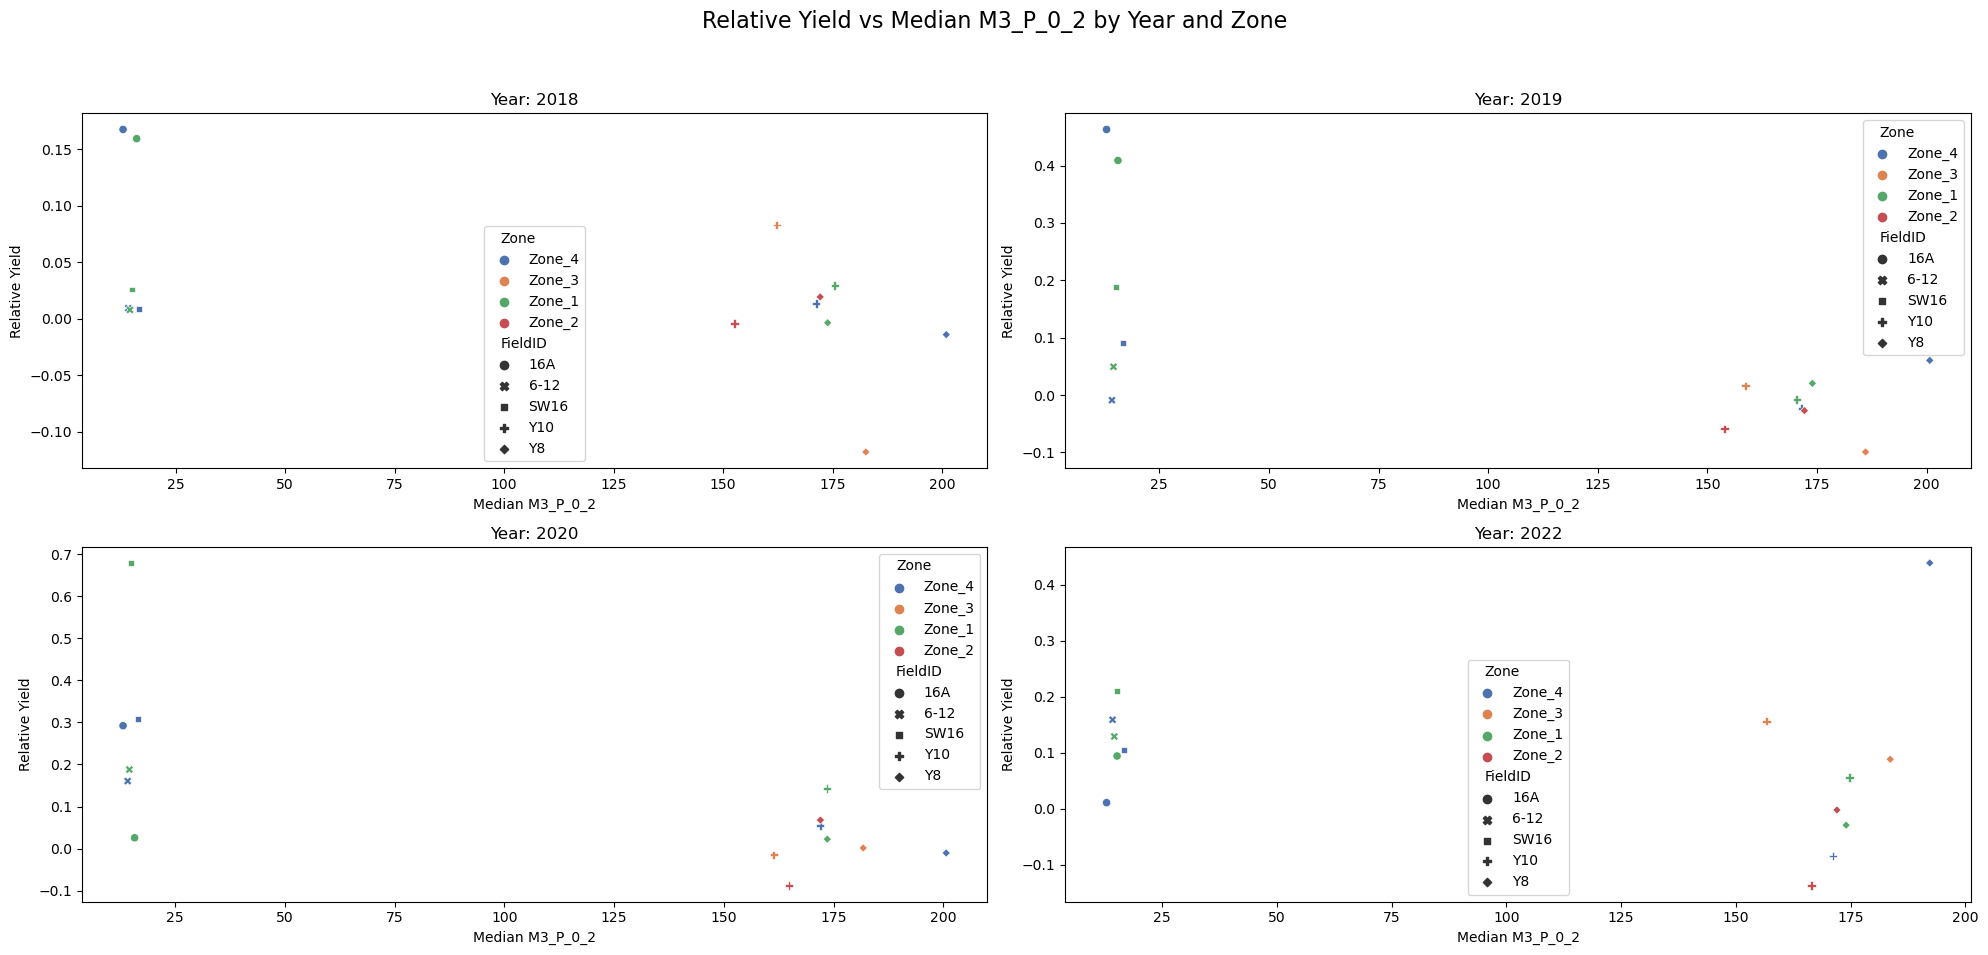

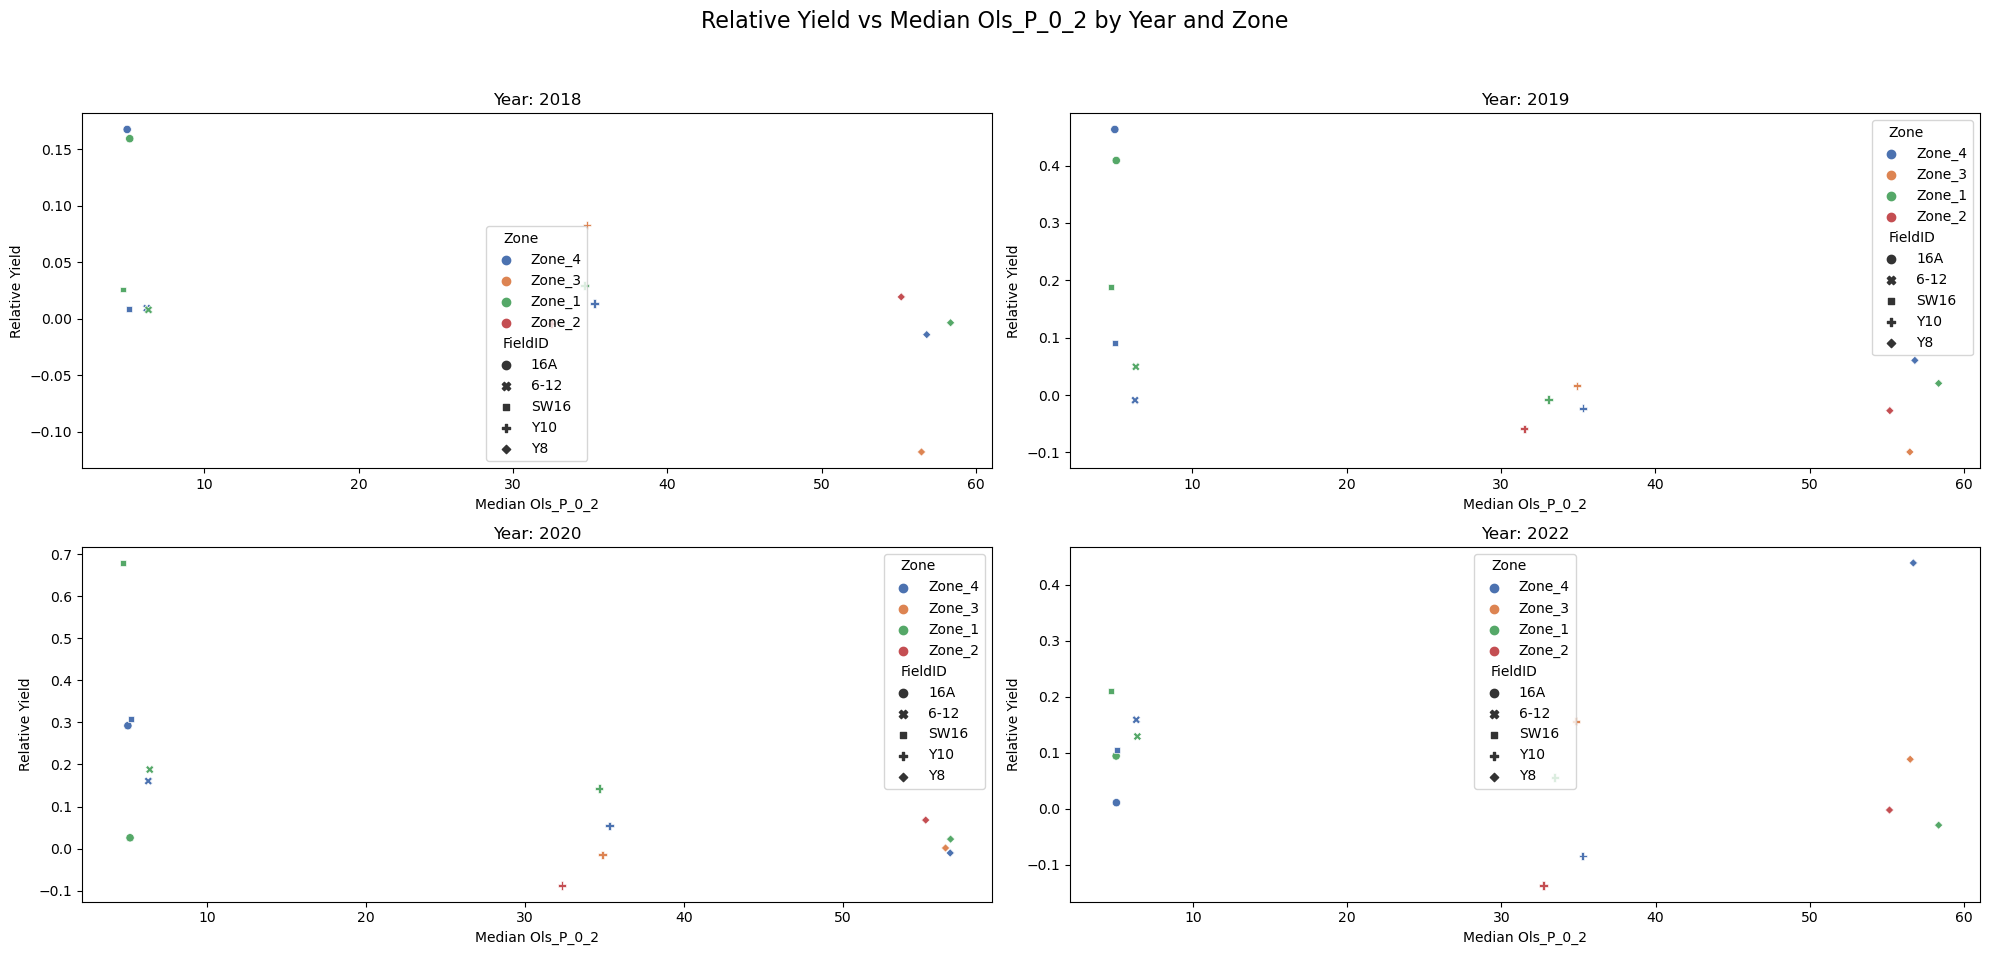

In [14]:
# Define your soil tests, zone columns, and years
soil_tests = ['H3A_P_0_2', 'M3_P_0_2', 'Ols_P_0_2']
zone_cols = ['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']
years = df_copy['Year'].unique()

# Calculate average control yield and relative yield for all fields
for field, control_dict in control_dicts.items():
    field_index = df_copy['FieldID'] == field
    field_data = df_copy.loc[field_index]

    # Calculate average control yield
    df_copy.loc[field_index, 'Average_Control_Yield'] = field_data.apply(
        lambda row: calculate_control_avg(row, control_dict, 'Yield', zone_cols), axis=1
    )

    # Calculate relative yield
    df_copy.loc[field_index, 'Relative_Yield'] = (
        field_data['Yield'] - df_copy.loc[field_index, 'Average_Control_Yield']
    ) / df_copy.loc[field_index, 'Average_Control_Yield']

# Plotting one figure per soil test
for test in soil_tests:
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Relative Yield vs Median {test} by Year and Zone", fontsize=16)

    for i, year in enumerate(years, 1):
        ax = plt.subplot(2, 2, i)
        year_data = df_copy[df_copy['Year'] == year]
        grouped = year_data.groupby(['FieldID'] + zone_cols)[[test, 'Relative_Yield']].median().reset_index()
        grouped['Zone'] = grouped[zone_cols].idxmax(axis=1)

        sns.scatterplot(
            x=grouped[test], 
            y=grouped['Relative_Yield'],
            hue=grouped['Zone'],
            style=grouped['FieldID'],
            palette='deep', ax=ax
        )
        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Relative Yield")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

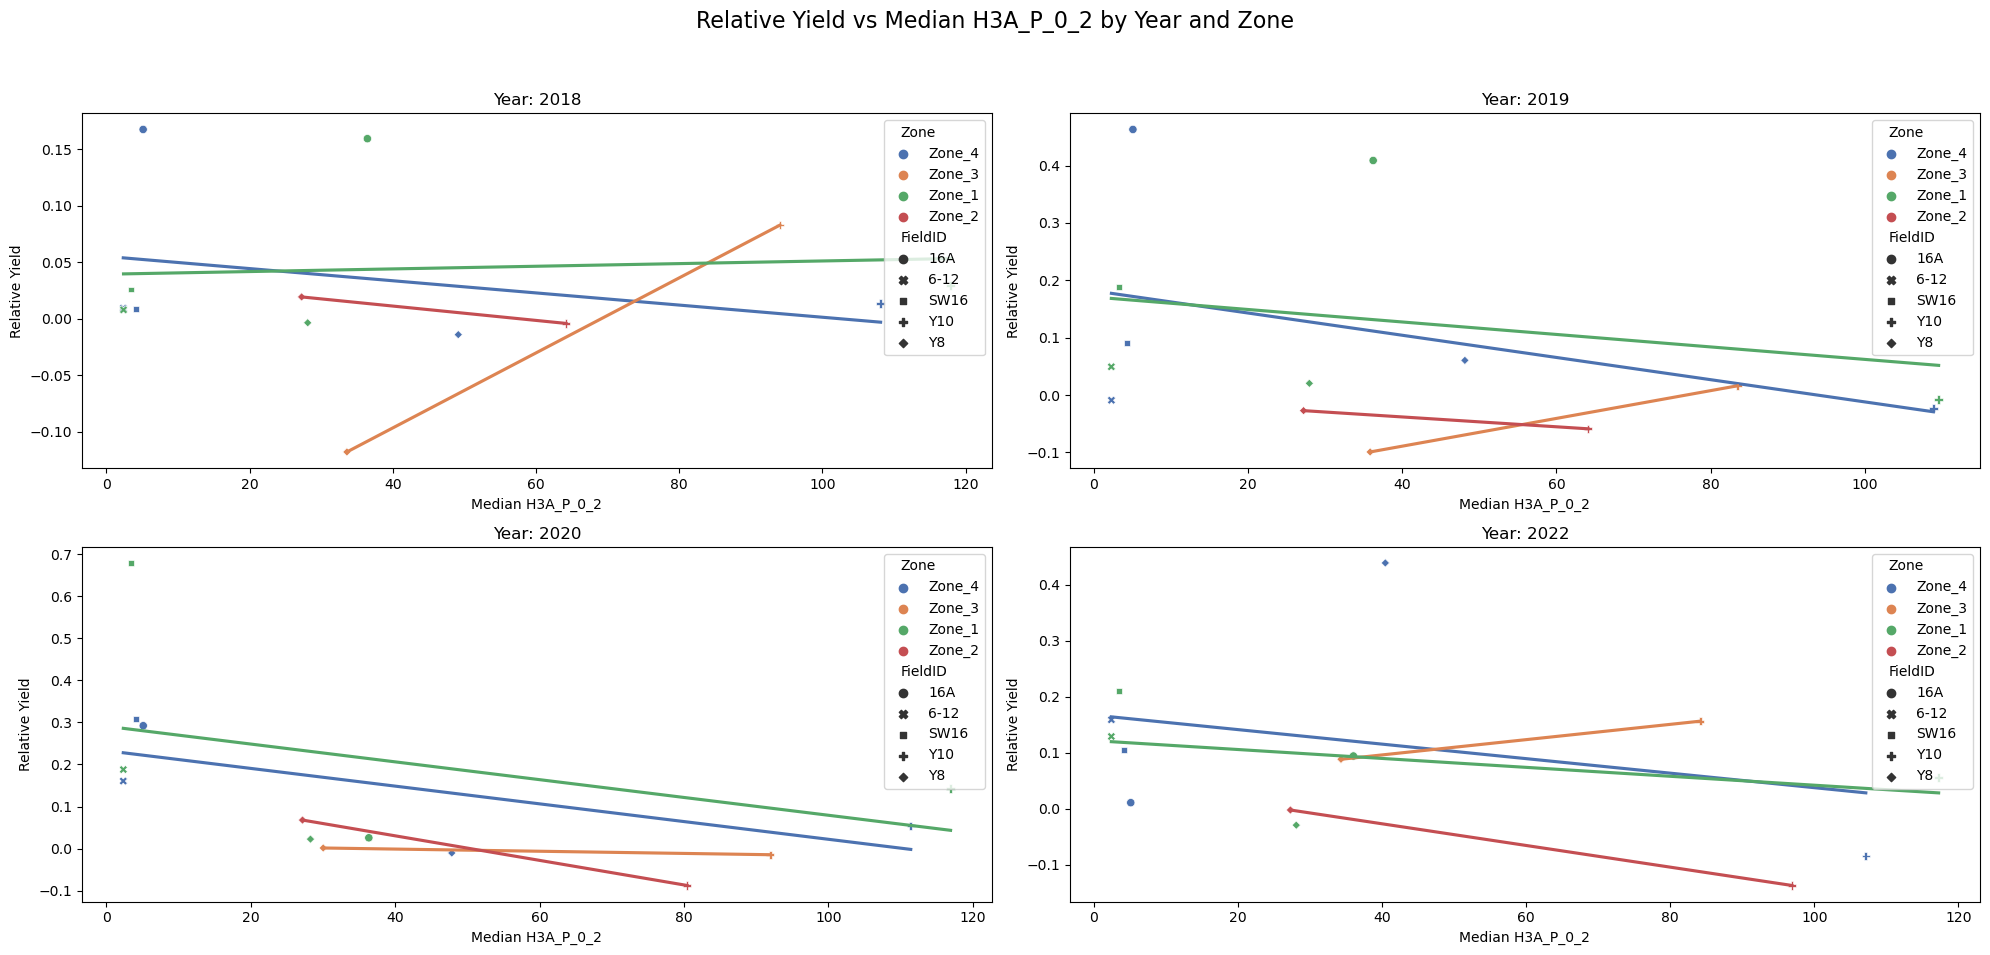

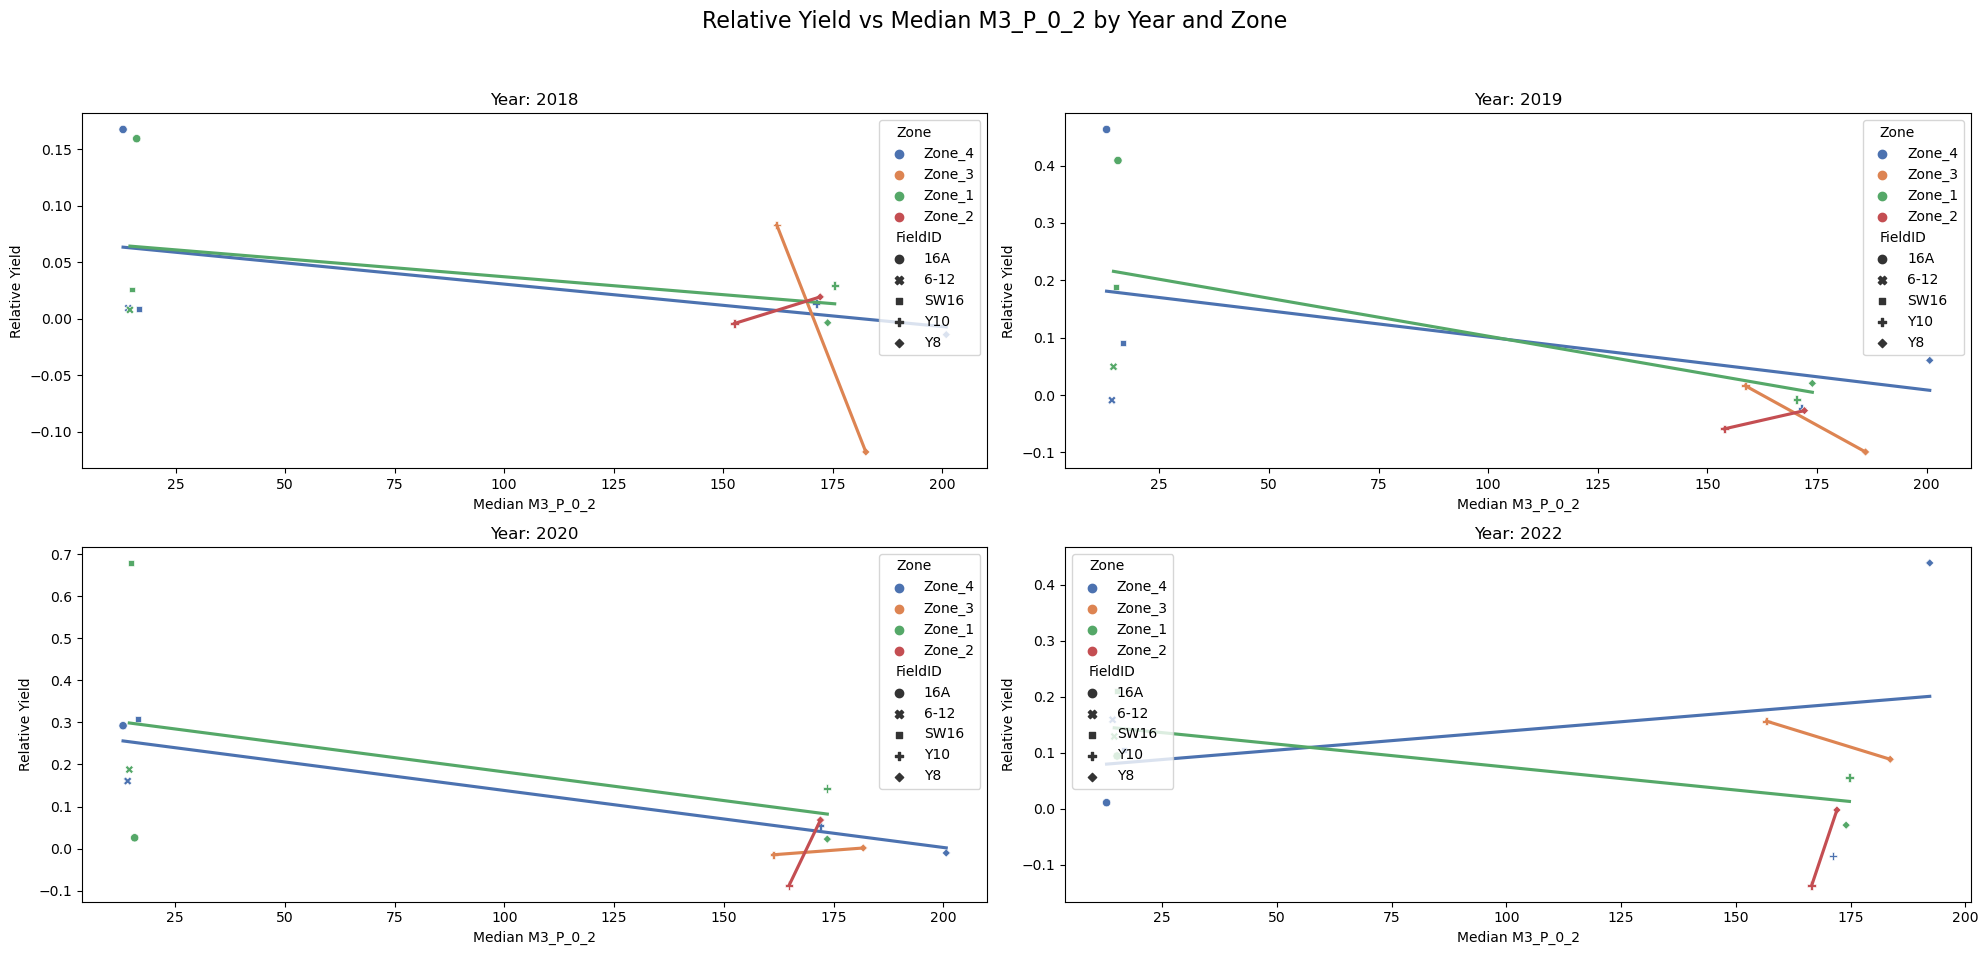

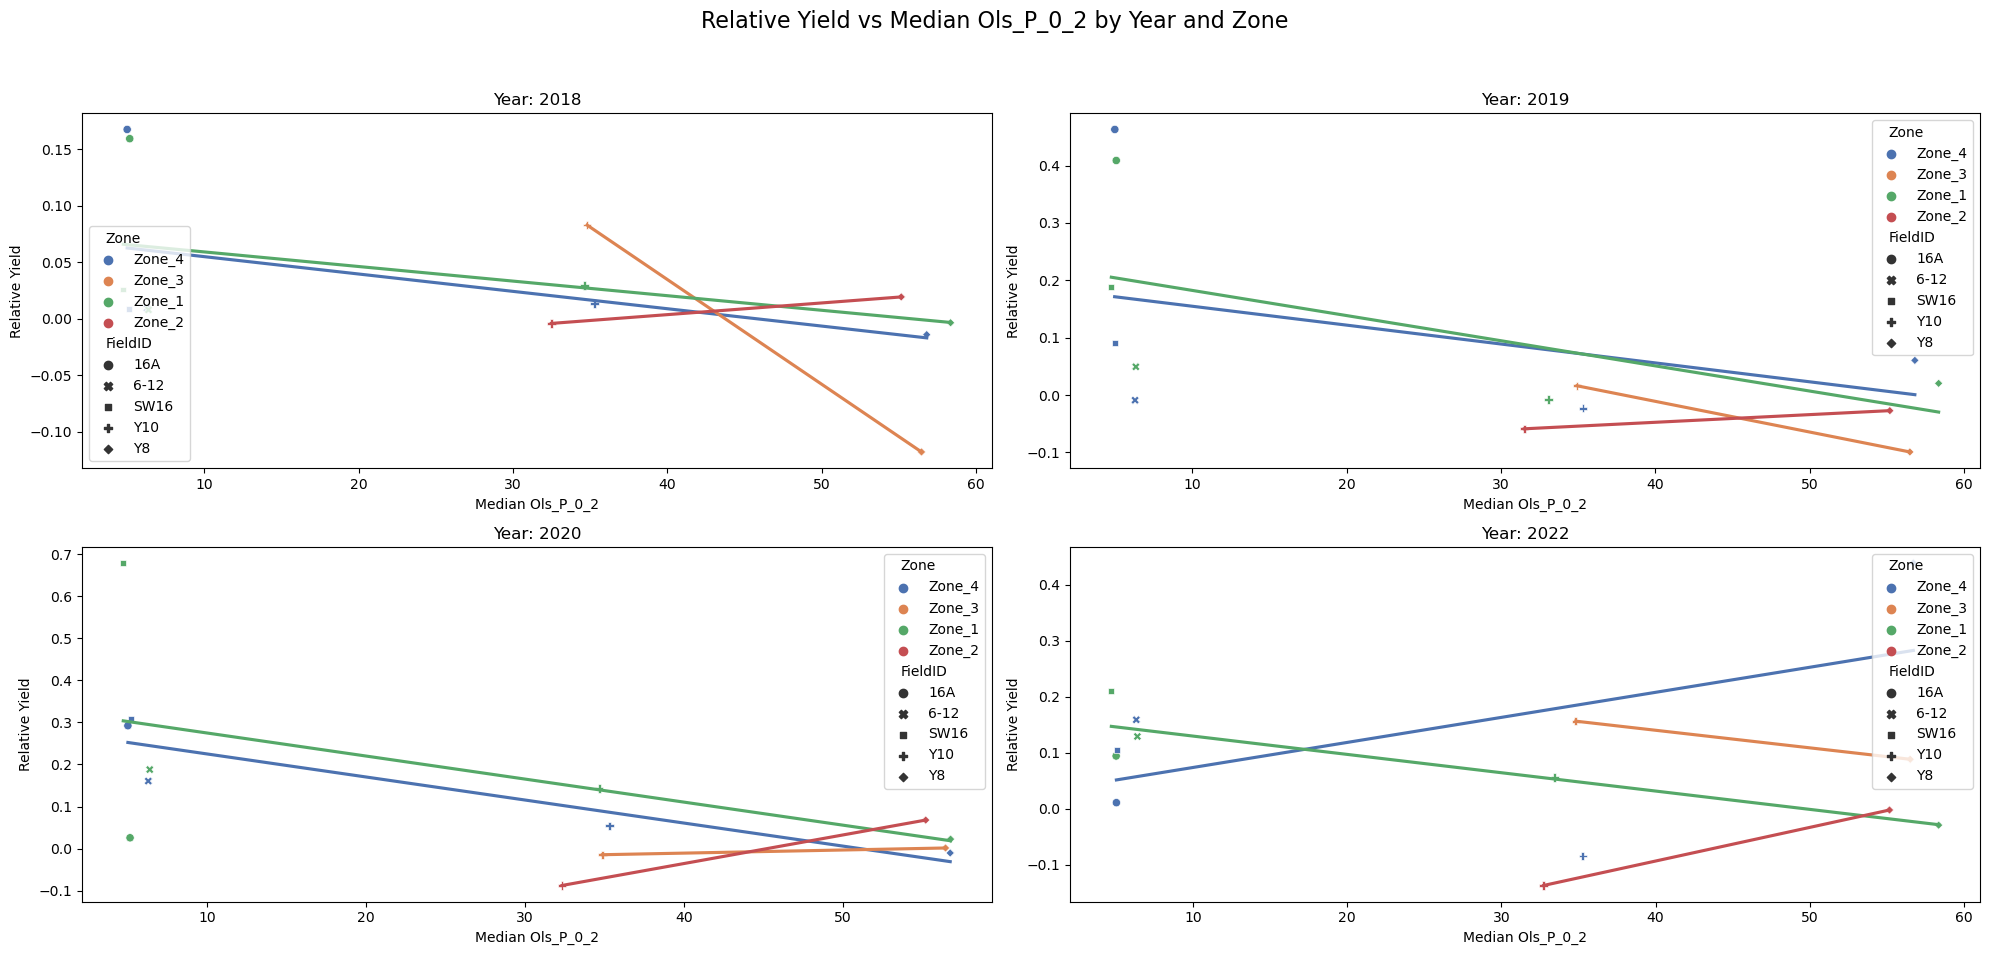

In [15]:
# Define your soil tests, zone columns, and years
soil_tests = ['H3A_P_0_2', 'M3_P_0_2', 'Ols_P_0_2']
zone_cols = ['Zone_1', 'Zone_2', 'Zone_3', 'Zone_4']
years = df_copy['Year'].unique()

# Plotting one figure per soil test with regression lines for each zone
for test in soil_tests:
    plt.figure(figsize=(20, 10))
    plt.suptitle(f"Relative Yield vs Median {test} by Year and Zone", fontsize=16)

    for i, year in enumerate(years, 1):
        ax = plt.subplot(2, 2, i)
        year_data = df_copy[df_copy['Year'] == year]
        grouped = year_data.groupby(['FieldID'] + zone_cols)[[test, 'Relative_Yield']].median().reset_index()
        grouped['Zone'] = grouped[zone_cols].idxmax(axis=1)

        # Scatter plot
        sns.scatterplot(
            x=grouped[test], 
            y=grouped['Relative_Yield'],
            hue=grouped['Zone'],
            style=grouped['FieldID'],
            palette='deep', ax=ax
        )

        # Add regression lines for each zone
        zones = grouped['Zone'].unique()
        for zone in zones:
            zone_data = grouped[grouped['Zone'] == zone]
            sns.regplot(
                x=test, y='Relative_Yield', data=zone_data, 
                scatter=False, ax=ax, 
                color=sns.color_palette('deep')[list(zones).index(zone)], 
                ci=False
            )

        plt.title(f"Year: {year}")
        plt.xlabel(f"Median {test}")
        plt.ylabel("Relative Yield")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()